In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

C:\Users\Vishwas\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Vishwas\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv(r'\Data\FB.csv')

In [3]:
df['Close'] = df['Close']

In [4]:
train = df.Close[0:-30]
test = df.Close[-30:]

In [5]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [6]:
from sklearn.model_selection import ParameterGrid
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))



In [ ]:
''''
Holt Parameters:

    endog (array-like) – Time series
    expoential (bool, optional) – Type of trend component.
    damped (bool, optional) – Should the trend component be damped.
''''

In [ ]:
''''
fit Parameters:

    smoothing_level (float, optional) – The alpha value of the simple exponential smoothing, if the value is set then this value will be used as the value.
    smoothing_slope (float, optional) – The beta value of the holts trend method, if the value is set then this value will be used as the value.
    damping_slope (float, optional) – The phi value of the damped method, if the value is set then this value will be used as the value.
    optimized (bool, optional) – Should the values that have not been set above be optimized automatically?
    '''


In [7]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


0.1 0.1 0.1 True
1229    184.717490
1230    184.717692
1231    184.717712
1232    184.717714
1233    184.717714
1234    184.717714
1235    184.717714
1236    184.717714
1237    184.717714
1238    184.717714
1239    184.717714
1240    184.717714
1241    184.717714
1242    184.717714
1243    184.717714
1244    184.717714
1245    184.717714
1246    184.717714
1247    184.717714
1248    184.717714
1249    184.717714
1250    184.717714
1251    184.717714
1252    184.717714
1253    184.717714
1254    184.717714
1255    184.717714
1256    184.717714
1257    184.717714
1258    184.717714
dtype: float64
 RMSE is 11.399219266471489
0.1 0.2 0.1 True
1229    184.729601
1230    184.730001
1231    184.730041
1232    184.730045
1233    184.730046
1234    184.730046
1235    184.730046
1236    184.730046
1237    184.730046
1238    184.730046
1239    184.730046
1240    184.730046
1241    184.730046
1242    184.730046
1243    184.730046
1244    184.730046
1245    184.730046
1246    184.730046
1247    184

 RMSE is 10.349514145054153
0.2 0.7 0.1 True
1229    185.872563
1230    185.873488
1231    185.873581
1232    185.873590
1233    185.873591
1234    185.873591
1235    185.873591
1236    185.873591
1237    185.873591
1238    185.873591
1239    185.873591
1240    185.873591
1241    185.873591
1242    185.873591
1243    185.873591
1244    185.873591
1245    185.873591
1246    185.873591
1247    185.873591
1248    185.873591
1249    185.873591
1250    185.873591
1251    185.873591
1252    185.873591
1253    185.873591
1254    185.873591
1255    185.873591
1256    185.873591
1257    185.873591
1258    185.873591
dtype: float64
 RMSE is 10.336947235128726
0.2 0.8 0.1 True
1229    185.885849
1230    185.886878
1231    185.886980
1232    185.886991
1233    185.886992
1234    185.886992
1235    185.886992
1236    185.886992
1237    185.886992
1238    185.886992
1239    185.886992
1240    185.886992
1241    185.886992
1242    185.886992
1243    185.886992
1244    185.886992
1245    185.886992
12

 RMSE is 10.09852890973309
0.4 0.5 0.1 True
1229    186.132083
1230    186.132885
1231    186.132965
1232    186.132973
1233    186.132973
1234    186.132974
1235    186.132974
1236    186.132974
1237    186.132974
1238    186.132974
1239    186.132974
1240    186.132974
1241    186.132974
1242    186.132974
1243    186.132974
1244    186.132974
1245    186.132974
1246    186.132974
1247    186.132974
1248    186.132974
1249    186.132974
1250    186.132974
1251    186.132974
1252    186.132974
1253    186.132974
1254    186.132974
1255    186.132974
1256    186.132974
1257    186.132974
1258    186.132974
dtype: float64
 RMSE is 10.101390899882322
0.4 0.6 0.1 True
1229    186.128691
1230    186.129676
1231    186.129774
1232    186.129784
1233    186.129785
1234    186.129785
1235    186.129785
1236    186.129785
1237    186.129785
1238    186.129785
1239    186.129785
1240    186.129785
1241    186.129785
1242    186.129785
1243    186.129785
1244    186.129785
1245    186.129785
124

 RMSE is 10.137931506969839
0.6 0.2 0.1 True
1229    186.093275
1230    186.094245
1231    186.094342
1232    186.094352
1233    186.094353
1234    186.094353
1235    186.094353
1236    186.094353
1237    186.094353
1238    186.094353
1239    186.094353
1240    186.094353
1241    186.094353
1242    186.094353
1243    186.094353
1244    186.094353
1245    186.094353
1246    186.094353
1247    186.094353
1248    186.094353
1249    186.094353
1250    186.094353
1251    186.094353
1252    186.094353
1253    186.094353
1254    186.094353
1255    186.094353
1256    186.094353
1257    186.094353
1258    186.094353
dtype: float64
 RMSE is 10.136391453373239
0.6 0.3 0.1 True
1229    186.094713
1230    186.096190
1231    186.096338
1232    186.096353
1233    186.096354
1234    186.096354
1235    186.096354
1236    186.096354
1237    186.096354
1238    186.096354
1239    186.096354
1240    186.096354
1241    186.096354
1242    186.096354
1243    186.096354
1244    186.096354
1245    186.096354
12

1229    186.188031
1230    186.192643
1231    186.193104
1232    186.193151
1233    186.193155
1234    186.193156
1235    186.193156
1236    186.193156
1237    186.193156
1238    186.193156
1239    186.193156
1240    186.193156
1241    186.193156
1242    186.193156
1243    186.193156
1244    186.193156
1245    186.193156
1246    186.193156
1247    186.193156
1248    186.193156
1249    186.193156
1250    186.193156
1251    186.193156
1252    186.193156
1253    186.193156
1254    186.193156
1255    186.193156
1256    186.193156
1257    186.193156
1258    186.193156
dtype: float64
 RMSE is 10.046933842922915
0.7 0.8 0.1 True
1229    186.194842
1230    186.200136
1231    186.200666
1232    186.200719
1233    186.200724
1234    186.200724
1235    186.200725
1236    186.200725
1237    186.200725
1238    186.200725
1239    186.200725
1240    186.200725
1241    186.200725
1242    186.200725
1243    186.200725
1244    186.200725
1245    186.200725
1246    186.200725
1247    186.200725
1248    1

1229    186.359581
1230    186.362223
1231    186.362487
1232    186.362513
1233    186.362516
1234    186.362516
1235    186.362516
1236    186.362516
1237    186.362516
1238    186.362516
1239    186.362516
1240    186.362516
1241    186.362516
1242    186.362516
1243    186.362516
1244    186.362516
1245    186.362516
1246    186.362516
1247    186.362516
1248    186.362516
1249    186.362516
1250    186.362516
1251    186.362516
1252    186.362516
1253    186.362516
1254    186.362516
1255    186.362516
1256    186.362516
1257    186.362516
1258    186.362516
dtype: float64
 RMSE is 9.893941437555887
0.9 0.5 0.1 True
1229    186.367572
1230    186.370808
1231    186.371132
1232    186.371164
1233    186.371167
1234    186.371167
1235    186.371168
1236    186.371168
1237    186.371168
1238    186.371168
1239    186.371168
1240    186.371168
1241    186.371168
1242    186.371168
1243    186.371168
1244    186.371168
1245    186.371168
1246    186.371168
1247    186.371168
1248    18

1229    185.804850
1230    185.805428
1231    185.805544
1232    185.805567
1233    185.805572
1234    185.805572
1235    185.805573
1236    185.805573
1237    185.805573
1238    185.805573
1239    185.805573
1240    185.805573
1241    185.805573
1242    185.805573
1243    185.805573
1244    185.805573
1245    185.805573
1246    185.805573
1247    185.805573
1248    185.805573
1249    185.805573
1250    185.805573
1251    185.805573
1252    185.805573
1253    185.805573
1254    185.805573
1255    185.805573
1256    185.805573
1257    185.805573
1258    185.805573
dtype: float64
 RMSE is 10.398903612271814
0.2 0.2 0.2 True
1229    185.839331
1230    185.840402
1231    185.840616
1232    185.840659
1233    185.840667
1234    185.840669
1235    185.840669
1236    185.840669
1237    185.840669
1238    185.840669
1239    185.840669
1240    185.840669
1241    185.840669
1242    185.840669
1243    185.840669
1244    185.840669
1245    185.840669
1246    185.840669
1247    185.840669
1248    1

1229    186.159477
1230    186.160713
1231    186.160961
1232    186.161010
1233    186.161020
1234    186.161022
1235    186.161023
1236    186.161023
1237    186.161023
1238    186.161023
1239    186.161023
1240    186.161023
1241    186.161023
1242    186.161023
1243    186.161023
1244    186.161023
1245    186.161023
1246    186.161023
1247    186.161023
1248    186.161023
1249    186.161023
1250    186.161023
1251    186.161023
1252    186.161023
1253    186.161023
1254    186.161023
1255    186.161023
1256    186.161023
1257    186.161023
1258    186.161023
dtype: float64
 RMSE is 10.075995356648576
0.3 0.9 0.2 True
1229    186.155107
1230    186.156561
1231    186.156851
1232    186.156910
1233    186.156921
1234    186.156923
1235    186.156924
1236    186.156924
1237    186.156924
1238    186.156924
1239    186.156924
1240    186.156924
1241    186.156924
1242    186.156924
1243    186.156924
1244    186.156924
1245    186.156924
1246    186.156924
1247    186.156924
1248    1

 RMSE is 10.161463530302106
0.5 0.6 0.2 True
1229    186.054043
1230    186.062313
1231    186.063967
1232    186.064298
1233    186.064364
1234    186.064378
1235    186.064380
1236    186.064381
1237    186.064381
1238    186.064381
1239    186.064381
1240    186.064381
1241    186.064381
1242    186.064381
1243    186.064381
1244    186.064381
1245    186.064381
1246    186.064381
1247    186.064381
1248    186.064381
1249    186.064381
1250    186.064381
1251    186.064381
1252    186.064381
1253    186.064381
1254    186.064381
1255    186.064381
1256    186.064381
1257    186.064381
1258    186.064381
dtype: float64
 RMSE is 10.163653366158012
0.5 0.7 0.2 True
1229    186.050477
1230    186.060633
1231    186.062664
1232    186.063071
1233    186.063152
1234    186.063168
1235    186.063171
1236    186.063172
1237    186.063172
1238    186.063172
1239    186.063172
1240    186.063172
1241    186.063172
1242    186.063172
1243    186.063172
1244    186.063172
1245    186.063172
12

1229    186.164809
1230    186.170155
1231    186.171225
1232    186.171439
1233    186.171481
1234    186.171490
1235    186.171492
1236    186.171492
1237    186.171492
1238    186.171492
1239    186.171492
1240    186.171492
1241    186.171492
1242    186.171492
1243    186.171492
1244    186.171492
1245    186.171492
1246    186.171492
1247    186.171492
1248    186.171492
1249    186.171492
1250    186.171492
1251    186.171492
1252    186.171492
1253    186.171492
1254    186.171492
1255    186.171492
1256    186.171492
1257    186.171492
1258    186.171492
dtype: float64
 RMSE is 10.066560345269224
0.7 0.3 0.2 True
1229    186.175992
1230    186.184240
1231    186.185890
1232    186.186220
1233    186.186286
1234    186.186299
1235    186.186302
1236    186.186302
1237    186.186302
1238    186.186302
1239    186.186302
1240    186.186302
1241    186.186302
1242    186.186302
1243    186.186302
1244    186.186302
1245    186.186302
1246    186.186302
1247    186.186302
1248    1

1229    186.384083
1230    186.410082
1231    186.415282
1232    186.416322
1233    186.416530
1234    186.416572
1235    186.416580
1236    186.416582
1237    186.416582
1238    186.416582
1239    186.416582
1240    186.416582
1241    186.416582
1242    186.416582
1243    186.416582
1244    186.416582
1245    186.416582
1246    186.416582
1247    186.416582
1248    186.416582
1249    186.416582
1250    186.416582
1251    186.416582
1252    186.416582
1253    186.416582
1254    186.416582
1255    186.416582
1256    186.416582
1257    186.416582
1258    186.416582
dtype: float64
 RMSE is 9.845445956972316
0.8 0.9 0.2 True
1229    186.404446
1230    186.433537
1231    186.439355
1232    186.440519
1233    186.440752
1234    186.440798
1235    186.440808
1236    186.440810
1237    186.440810
1238    186.440810
1239    186.440810
1240    186.440810
1241    186.440810
1242    186.440810
1243    186.440810
1244    186.440810
1245    186.440810
1246    186.440810
1247    186.440810
1248    18

1229    185.013360
1230    185.023981
1231    185.027167
1232    185.028123
1233    185.028410
1234    185.028496
1235    185.028522
1236    185.028530
1237    185.028532
1238    185.028533
1239    185.028533
1240    185.028533
1241    185.028533
1242    185.028533
1243    185.028533
1244    185.028533
1245    185.028533
1246    185.028533
1247    185.028533
1248    185.028533
1249    185.028533
1250    185.028533
1251    185.028533
1252    185.028533
1253    185.028533
1254    185.028533
1255    185.028533
1256    185.028533
1257    185.028533
1258    185.028533
dtype: float64
 RMSE is 11.111946218456605
0.1 0.7 0.3 True
1229    185.068137
1230    185.080008
1231    185.083570
1232    185.084638
1233    185.084958
1234    185.085055
1235    185.085083
1236    185.085092
1237    185.085095
1238    185.085096
1239    185.085096
1240    185.085096
1241    185.085096
1242    185.085096
1243    185.085096
1244    185.085096
1245    185.085096
1246    185.085096
1247    185.085096
1248    1

1229    186.169859
1230    186.168928
1231    186.168649
1232    186.168565
1233    186.168540
1234    186.168533
1235    186.168531
1236    186.168530
1237    186.168530
1238    186.168530
1239    186.168530
1240    186.168530
1241    186.168530
1242    186.168530
1243    186.168530
1244    186.168530
1245    186.168530
1246    186.168530
1247    186.168530
1248    186.168530
1249    186.168530
1250    186.168530
1251    186.168530
1252    186.168530
1253    186.168530
1254    186.168530
1255    186.168530
1256    186.168530
1257    186.168530
1258    186.168530
dtype: float64
 RMSE is 10.069172610711169
0.3 0.4 0.3 True
1229    186.167292
1230    186.165860
1231    186.165431
1232    186.165302
1233    186.165264
1234    186.165252
1235    186.165249
1236    186.165247
1237    186.165247
1238    186.165247
1239    186.165247
1240    186.165247
1241    186.165247
1242    186.165247
1243    186.165247
1244    186.165247
1245    186.165247
1246    186.165247
1247    186.165247
1248    1

1229    186.075984
1230    186.077420
1231    186.077851
1232    186.077981
1233    186.078020
1234    186.078031
1235    186.078035
1236    186.078036
1237    186.078036
1238    186.078036
1239    186.078036
1240    186.078036
1241    186.078036
1242    186.078036
1243    186.078036
1244    186.078036
1245    186.078036
1246    186.078036
1247    186.078036
1248    186.078036
1249    186.078036
1250    186.078036
1251    186.078036
1252    186.078036
1253    186.078036
1254    186.078036
1255    186.078036
1256    186.078036
1257    186.078036
1258    186.078036
dtype: float64
 RMSE is 10.151200081561171
0.5 0.2 0.3 True
1229    186.058500
1230    186.061944
1231    186.062978
1232    186.063288
1233    186.063381
1234    186.063409
1235    186.063417
1236    186.063419
1237    186.063420
1238    186.063420
1239    186.063420
1240    186.063420
1241    186.063420
1242    186.063420
1243    186.063420
1244    186.063420
1245    186.063420
1246    186.063420
1247    186.063420
1248    1

 RMSE is 10.070698343359753
0.6 0.8 0.3 True
1229    186.128468
1230    186.175556
1231    186.189682
1232    186.193920
1233    186.195192
1234    186.195573
1235    186.195688
1236    186.195722
1237    186.195732
1238    186.195735
1239    186.195736
1240    186.195736
1241    186.195737
1242    186.195737
1243    186.195737
1244    186.195737
1245    186.195737
1246    186.195737
1247    186.195737
1248    186.195737
1249    186.195737
1250    186.195737
1251    186.195737
1252    186.195737
1253    186.195737
1254    186.195737
1255    186.195737
1256    186.195737
1257    186.195737
1258    186.195737
dtype: float64
 RMSE is 10.045255519190533
0.6 0.9 0.3 True
1229    186.148238
1230    186.203789
1231    186.220455
1232    186.225455
1233    186.226954
1234    186.227404
1235    186.227539
1236    186.227580
1237    186.227592
1238    186.227596
1239    186.227597
1240    186.227597
1241    186.227597
1242    186.227597
1243    186.227597
1244    186.227597
1245    186.227597
12

1229    186.337198
1230    186.367911
1231    186.377125
1232    186.379889
1233    186.380719
1234    186.380967
1235    186.381042
1236    186.381064
1237    186.381071
1238    186.381073
1239    186.381074
1240    186.381074
1241    186.381074
1242    186.381074
1243    186.381074
1244    186.381074
1245    186.381074
1246    186.381074
1247    186.381074
1248    186.381074
1249    186.381074
1250    186.381074
1251    186.381074
1252    186.381074
1253    186.381074
1254    186.381074
1255    186.381074
1256    186.381074
1257    186.381074
1258    186.381074
dtype: float64
 RMSE is 9.877610882579434
0.8 0.5 0.3 True
1229    186.369005
1230    186.408363
1231    186.420171
1232    186.423713
1233    186.424776
1234    186.425095
1235    186.425190
1236    186.425219
1237    186.425228
1238    186.425230
1239    186.425231
1240    186.425231
1241    186.425231
1242    186.425231
1243    186.425231
1244    186.425231
1245    186.425231
1246    186.425231
1247    186.425231
1248    18

 RMSE is 11.33670789348578
0.1 0.2 0.4 True
1229    184.857599
1230    184.865721
1231    184.868969
1232    184.870268
1233    184.870788
1234    184.870996
1235    184.871079
1236    184.871112
1237    184.871126
1238    184.871131
1239    184.871133
1240    184.871134
1241    184.871134
1242    184.871135
1243    184.871135
1244    184.871135
1245    184.871135
1246    184.871135
1247    184.871135
1248    184.871135
1249    184.871135
1250    184.871135
1251    184.871135
1252    184.871135
1253    184.871135
1254    184.871135
1255    184.871135
1256    184.871135
1257    184.871135
1258    184.871135
dtype: float64
 RMSE is 11.257402261873596
0.1 0.3 0.4 True
1229    184.941444
1230    184.952965
1231    184.957574
1232    184.959417
1233    184.960154
1234    184.960449
1235    184.960567
1236    184.960614
1237    184.960633
1238    184.960641
1239    184.960644
1240    184.960645
1241    184.960646
1242    184.960646
1243    184.960646
1244    184.960646
1245    184.960646
124

0.2 0.7 0.4 True
1229    186.207049
1230    186.196893
1231    186.192830
1232    186.191205
1233    186.190555
1234    186.190295
1235    186.190191
1236    186.190150
1237    186.190133
1238    186.190126
1239    186.190124
1240    186.190123
1241    186.190122
1242    186.190122
1243    186.190122
1244    186.190122
1245    186.190122
1246    186.190122
1247    186.190122
1248    186.190122
1249    186.190122
1250    186.190122
1251    186.190122
1252    186.190122
1253    186.190122
1254    186.190122
1255    186.190122
1256    186.190122
1257    186.190122
1258    186.190122
dtype: float64
 RMSE is 10.04942652780801
0.2 0.8 0.4 True
1229    186.222837
1230    186.208641
1231    186.202962
1232    186.200691
1233    186.199782
1234    186.199419
1235    186.199273
1236    186.199215
1237    186.199192
1238    186.199183
1239    186.199179
1240    186.199177
1241    186.199177
1242    186.199177
1243    186.199176
1244    186.199176
1245    186.199176
1246    186.199176
1247    186.

0.4 0.4 0.4 True
1229    186.019548
1230    186.015277
1231    186.013568
1232    186.012885
1233    186.012611
1234    186.012502
1235    186.012458
1236    186.012441
1237    186.012434
1238    186.012431
1239    186.012430
1240    186.012429
1241    186.012429
1242    186.012429
1243    186.012429
1244    186.012429
1245    186.012429
1246    186.012429
1247    186.012429
1248    186.012429
1249    186.012429
1250    186.012429
1251    186.012429
1252    186.012429
1253    186.012429
1254    186.012429
1255    186.012429
1256    186.012429
1257    186.012429
1258    186.012429
dtype: float64
 RMSE is 10.210614760433549
0.4 0.5 0.4 True
1229    185.981001
1230    185.978126
1231    185.976976
1232    185.976516
1233    185.976332
1234    185.976259
1235    185.976229
1236    185.976217
1237    185.976213
1238    185.976211
1239    185.976210
1240    185.976210
1241    185.976210
1242    185.976210
1243    185.976210
1244    185.976210
1245    185.976210
1246    185.976210
1247    185

 RMSE is 10.18044125957507
0.6 0.1 0.4 True
1229    186.071205
1230    186.074984
1231    186.076496
1232    186.077100
1233    186.077342
1234    186.077439
1235    186.077478
1236    186.077493
1237    186.077499
1238    186.077502
1239    186.077503
1240    186.077503
1241    186.077503
1242    186.077503
1243    186.077504
1244    186.077504
1245    186.077504
1246    186.077504
1247    186.077504
1248    186.077504
1249    186.077504
1250    186.077504
1251    186.077504
1252    186.077504
1253    186.077504
1254    186.077504
1255    186.077504
1256    186.077504
1257    186.077504
1258    186.077504
dtype: float64
 RMSE is 10.15174559645505
0.6 0.2 0.4 True
1229    186.057131
1230    186.066877
1231    186.070775
1232    186.072334
1233    186.072958
1234    186.073207
1235    186.073307
1236    186.073347
1237    186.073363
1238    186.073369
1239    186.073372
1240    186.073373
1241    186.073373
1242    186.073374
1243    186.073374
1244    186.073374
1245    186.073374
1246

1229    186.271441
1230    186.349380
1231    186.380556
1232    186.393027
1233    186.398015
1234    186.400010
1235    186.400808
1236    186.401127
1237    186.401255
1238    186.401306
1239    186.401326
1240    186.401335
1241    186.401338
1242    186.401339
1243    186.401340
1244    186.401340
1245    186.401340
1246    186.401340
1247    186.401340
1248    186.401340
1249    186.401340
1250    186.401340
1251    186.401340
1252    186.401340
1253    186.401340
1254    186.401340
1255    186.401340
1256    186.401340
1257    186.401340
1258    186.401340
dtype: float64
 RMSE is 9.860515863312063
0.7 0.7 0.4 True
1229    186.316198
1230    186.412794
1231    186.451432
1232    186.466887
1233    186.473069
1234    186.475542
1235    186.476531
1236    186.476927
1237    186.477085
1238    186.477148
1239    186.477173
1240    186.477184
1241    186.477188
1242    186.477189
1243    186.477190
1244    186.477190
1245    186.477190
1246    186.477190
1247    186.477190
1248    18

1229    186.436644
1230    186.478294
1231    186.494954
1232    186.501618
1233    186.504284
1234    186.505350
1235    186.505776
1236    186.505947
1237    186.506015
1238    186.506043
1239    186.506054
1240    186.506058
1241    186.506060
1242    186.506060
1243    186.506061
1244    186.506061
1245    186.506061
1246    186.506061
1247    186.506061
1248    186.506061
1249    186.506061
1250    186.506061
1251    186.506061
1252    186.506061
1253    186.506061
1254    186.506061
1255    186.506061
1256    186.506061
1257    186.506061
1258    186.506061
dtype: float64
 RMSE is 9.765494509701442
0.9 0.4 0.4 True
1229    186.481228
1230    186.538642
1231    186.561608
1232    186.570794
1233    186.574468
1234    186.575938
1235    186.576526
1236    186.576761
1237    186.576855
1238    186.576893
1239    186.576908
1240    186.576914
1241    186.576916
1242    186.576917
1243    186.576918
1244    186.576918
1245    186.576918
1246    186.576918
1247    186.576918
1248    18

 RMSE is 10.315981541441625
0.2 0.1 0.5 True
1229    185.929726
1230    185.932897
1231    185.934483
1232    185.935276
1233    185.935672
1234    185.935871
1235    185.935970
1236    185.936019
1237    185.936044
1238    185.936057
1239    185.936063
1240    185.936066
1241    185.936067
1242    185.936068
1243    185.936069
1244    185.936069
1245    185.936069
1246    185.936069
1247    185.936069
1248    185.936069
1249    185.936069
1250    185.936069
1251    185.936069
1252    185.936069
1253    185.936069
1254    185.936069
1255    185.936069
1256    185.936069
1257    185.936069
1258    185.936069
dtype: float64
 RMSE is 10.280212379127523
0.2 0.2 0.5 True
1229    186.062374
1230    186.064537
1231    186.065619
1232    186.066159
1233    186.066430
1234    186.066565
1235    186.066633
1236    186.066666
1237    186.066683
1238    186.066692
1239    186.066696
1240    186.066698
1241    186.066699
1242    186.066700
1243    186.066700
1244    186.066700
1245    186.066700
12

1229    185.963440
1230    185.909150
1231    185.882005
1232    185.868433
1233    185.861647
1234    185.858253
1235    185.856557
1236    185.855709
1237    185.855284
1238    185.855072
1239    185.854966
1240    185.854913
1241    185.854887
1242    185.854874
1243    185.854867
1244    185.854864
1245    185.854862
1246    185.854861
1247    185.854861
1248    185.854861
1249    185.854860
1250    185.854860
1251    185.854860
1252    185.854860
1253    185.854860
1254    185.854860
1255    185.854860
1256    185.854860
1257    185.854860
1258    185.854860
dtype: float64
 RMSE is 10.35198311653937
0.3 0.8 0.5 True
1229    185.890002
1230    185.832250
1231    185.803374
1232    185.788936
1233    185.781717
1234    185.778107
1235    185.776302
1236    185.775400
1237    185.774949
1238    185.774723
1239    185.774610
1240    185.774554
1241    185.774526
1242    185.774512
1243    185.774505
1244    185.774501
1245    185.774499
1246    185.774498
1247    185.774498
1248    18

1229    185.892140
1230    185.894982
1231    185.896402
1232    185.897113
1233    185.897468
1234    185.897645
1235    185.897734
1236    185.897778
1237    185.897801
1238    185.897812
1239    185.897817
1240    185.897820
1241    185.897821
1242    185.897822
1243    185.897823
1244    185.897823
1245    185.897823
1246    185.897823
1247    185.897823
1248    185.897823
1249    185.897823
1250    185.897823
1251    185.897823
1252    185.897823
1253    185.897823
1254    185.897823
1255    185.897823
1256    185.897823
1257    185.897823
1258    185.897823
dtype: float64
 RMSE is 10.314990356482758
0.5 0.5 0.5 True
1229    185.858184
1230    185.872306
1231    185.879368
1232    185.882898
1233    185.884663
1234    185.885546
1235    185.885987
1236    185.886208
1237    185.886318
1238    185.886374
1239    185.886401
1240    185.886415
1241    185.886422
1242    185.886425
1243    185.886427
1244    185.886428
1245    185.886428
1246    185.886429
1247    185.886429
1248    1

dtype: float64
 RMSE is 10.08791094942402
0.7 0.2 0.5 True
1229    186.134373
1230    186.154121
1231    186.163995
1232    186.168932
1233    186.171401
1234    186.172635
1235    186.173252
1236    186.173561
1237    186.173715
1238    186.173792
1239    186.173831
1240    186.173850
1241    186.173860
1242    186.173864
1243    186.173867
1244    186.173868
1245    186.173869
1246    186.173869
1247    186.173869
1248    186.173869
1249    186.173869
1250    186.173869
1251    186.173869
1252    186.173869
1253    186.173869
1254    186.173869
1255    186.173869
1256    186.173869
1257    186.173869
1258    186.173869
dtype: float64
 RMSE is 10.06503433144045
0.7 0.3 0.5 True
1229    186.149767
1230    186.187910
1231    186.206982
1232    186.216518
1233    186.221286
1234    186.223670
1235    186.224862
1236    186.225458
1237    186.225756
1238    186.225905
1239    186.225979
1240    186.226017
1241    186.226035
1242    186.226045
1243    186.226049
1244    186.226052
1245    

1229    186.584298
1230    186.762883
1231    186.852176
1232    186.896822
1233    186.919145
1234    186.930307
1235    186.935887
1236    186.938678
1237    186.940073
1238    186.940771
1239    186.941119
1240    186.941294
1241    186.941381
1242    186.941425
1243    186.941446
1244    186.941457
1245    186.941463
1246    186.941465
1247    186.941467
1248    186.941467
1249    186.941468
1250    186.941468
1251    186.941468
1252    186.941468
1253    186.941468
1254    186.941468
1255    186.941468
1256    186.941468
1257    186.941468
1258    186.941468
dtype: float64
 RMSE is 9.380171872204471
0.8 0.8 0.5 True
1229    186.663598
1230    186.875157
1231    186.980936
1232    187.033825
1233    187.060270
1234    187.073493
1235    187.080104
1236    187.083409
1237    187.085062
1238    187.085889
1239    187.086302
1240    187.086508
1241    187.086612
1242    187.086663
1243    187.086689
1244    187.086702
1245    187.086709
1246    187.086712
1247    187.086713
1248    18

 RMSE is 10.578894542127529
0.1 0.5 0.6 True
1229    185.708412
1230    185.757121
1231    185.786346
1232    185.803881
1233    185.814402
1234    185.820715
1235    185.824502
1236    185.826775
1237    185.828139
1238    185.828957
1239    185.829448
1240    185.829742
1241    185.829919
1242    185.830025
1243    185.830088
1244    185.830127
1245    185.830149
1246    185.830163
1247    185.830171
1248    185.830176
1249    185.830179
1250    185.830181
1251    185.830182
1252    185.830183
1253    185.830183
1254    185.830183
1255    185.830184
1256    185.830184
1257    185.830184
1258    185.830184
dtype: float64
 RMSE is 10.379723187228684
0.1 0.6 0.6 True
1229    185.911056
1230    185.957296
1231    185.985040
1232    186.001686
1233    186.011674
1234    186.017666
1235    186.021262
1236    186.023419
1237    186.024714
1238    186.025490
1239    186.025956
1240    186.026236
1241    186.026404
1242    186.026504
1243    186.026565
1244    186.026601
1245    186.026623
12

1229    186.242612
1230    186.235629
1231    186.231439
1232    186.228925
1233    186.227417
1234    186.226512
1235    186.225969
1236    186.225643
1237    186.225448
1238    186.225331
1239    186.225260
1240    186.225218
1241    186.225193
1242    186.225178
1243    186.225168
1244    186.225163
1245    186.225160
1246    186.225158
1247    186.225157
1248    186.225156
1249    186.225155
1250    186.225155
1251    186.225155
1252    186.225155
1253    186.225155
1254    186.225155
1255    186.225155
1256    186.225155
1257    186.225155
1258    186.225155
dtype: float64
 RMSE is 10.017535636192102
0.3 0.2 0.6 True
1229    186.263092
1230    186.238166
1231    186.223210
1232    186.214237
1233    186.208853
1234    186.205622
1235    186.203684
1236    186.202521
1237    186.201823
1238    186.201405
1239    186.201154
1240    186.201003
1241    186.200912
1242    186.200858
1243    186.200826
1244    186.200806
1245    186.200794
1246    186.200787
1247    186.200783
1248    1

1229    185.535512
1230    185.479764
1231    185.446316
1232    185.426246
1233    185.414205
1234    185.406980
1235    185.402645
1236    185.400044
1237    185.398484
1238    185.397547
1239    185.396985
1240    185.396648
1241    185.396446
1242    185.396325
1243    185.396252
1244    185.396208
1245    185.396182
1246    185.396166
1247    185.396157
1248    185.396151
1249    185.396148
1250    185.396146
1251    185.396144
1252    185.396144
1253    185.396143
1254    185.396143
1255    185.396143
1256    185.396143
1257    185.396143
1258    185.396143
dtype: float64
 RMSE is 10.769421757379193
0.4 0.8 0.6 True
1229    185.468786
1230    185.433861
1231    185.412905
1232    185.400332
1233    185.392789
1234    185.388262
1235    185.385547
1236    185.383917
1237    185.382939
1238    185.382353
1239    185.382001
1240    185.381790
1241    185.381663
1242    185.381587
1243    185.381541
1244    185.381514
1245    185.381497
1246    185.381488
1247    185.381482
1248    1

 RMSE is 10.243120787419754
0.6 0.5 0.6 True
1229    185.919994
1230    185.979311
1231    186.014901
1232    186.036255
1233    186.049068
1234    186.056755
1235    186.061367
1236    186.064135
1237    186.065795
1238    186.066792
1239    186.067390
1240    186.067748
1241    186.067963
1242    186.068093
1243    186.068170
1244    186.068216
1245    186.068244
1246    186.068261
1247    186.068271
1248    186.068277
1249    186.068281
1250    186.068283
1251    186.068284
1252    186.068285
1253    186.068286
1254    186.068286
1255    186.068286
1256    186.068286
1257    186.068286
1258    186.068286
dtype: float64
 RMSE is 10.163787653867093
0.6 0.6 0.6 True
1229    185.952735
1230    186.054971
1231    186.116313
1232    186.153119
1233    186.175202
1234    186.188451
1235    186.196401
1236    186.201171
1237    186.204033
1238    186.205750
1239    186.206781
1240    186.207399
1241    186.207770
1242    186.207992
1243    186.208126
1244    186.208206
1245    186.208254
12

 RMSE is 8.933899696738148
0.8 0.1 0.6 True
1229    186.235505
1230    186.245757
1231    186.251907
1232    186.255598
1233    186.257812
1234    186.259141
1235    186.259938
1236    186.260416
1237    186.260703
1238    186.260875
1239    186.260979
1240    186.261041
1241    186.261078
1242    186.261100
1243    186.261113
1244    186.261121
1245    186.261126
1246    186.261129
1247    186.261131
1248    186.261132
1249    186.261133
1250    186.261133
1251    186.261133
1252    186.261133
1253    186.261133
1254    186.261133
1255    186.261133
1256    186.261133
1257    186.261133
1258    186.261133
dtype: float64
 RMSE is 9.986047047731025
0.8 0.2 0.6 True
1229    186.254835
1230    186.285833
1231    186.304432
1232    186.315592
1233    186.322287
1234    186.326305
1235    186.328715
1236    186.330161
1237    186.331029
1238    186.331550
1239    186.331862
1240    186.332050
1241    186.332162
1242    186.332230
1243    186.332270
1244    186.332294
1245    186.332309
1246

 RMSE is 9.123407708354154
0.9 0.7 0.6 True
1229    186.791054
1230    187.047560
1231    187.201463
1232    187.293805
1233    187.349210
1234    187.382453
1235    187.402399
1236    187.414367
1237    187.421547
1238    187.425855
1239    187.428440
1240    187.429991
1241    187.430922
1242    187.431480
1243    187.431815
1244    187.432016
1245    187.432137
1246    187.432209
1247    187.432253
1248    187.432279
1249    187.432294
1250    187.432304
1251    187.432309
1252    187.432313
1253    187.432315
1254    187.432316
1255    187.432317
1256    187.432317
1257    187.432317
1258    187.432318
dtype: float64
 RMSE is 8.952552534460992
0.9 0.8 0.6 True
1229    186.871220
1230    187.164624
1231    187.340667
1232    187.446292
1233    187.509667
1234    187.547692
1235    187.570507
1236    187.584196
1237    187.592410
1238    187.597338
1239    187.600295
1240    187.602069
1241    187.603133
1242    187.603772
1243    187.604155
1244    187.604385
1245    187.604523
1246

 RMSE is 9.697582578236345
0.2 0.5 0.7 True
1229    186.759226
1230    186.640301
1231    186.557054
1232    186.498781
1233    186.457990
1234    186.429436
1235    186.409448
1236    186.395457
1237    186.385663
1238    186.378807
1239    186.374008
1240    186.370649
1241    186.368297
1242    186.366651
1243    186.365499
1244    186.364692
1245    186.364128
1246    186.363732
1247    186.363456
1248    186.363262
1249    186.363127
1250    186.363032
1251    186.362965
1252    186.362919
1253    186.362886
1254    186.362863
1255    186.362848
1256    186.362836
1257    186.362829
1258    186.362823
dtype: float64
 RMSE is 9.879576652589956
0.2 0.6 0.7 True
1229    186.667817
1230    186.487173
1231    186.360722
1232    186.272206
1233    186.210245
1234    186.166873
1235    186.136512
1236    186.115259
1237    186.100382
1238    186.089969
1239    186.082679
1240    186.077576
1241    186.074004
1242    186.071504
1243    186.069754
1244    186.068528
1245    186.067671
1246

 RMSE is 11.876173109322844
0.4 0.1 0.7 True
1229    186.167496
1230    186.148890
1231    186.135866
1232    186.126749
1233    186.120367
1234    186.115900
1235    186.112773
1236    186.110584
1237    186.109051
1238    186.107979
1239    186.107228
1240    186.106703
1241    186.106335
1242    186.106077
1243    186.105897
1244    186.105771
1245    186.105682
1246    186.105620
1247    186.105577
1248    186.105547
1249    186.105526
1250    186.105511
1251    186.105500
1252    186.105493
1253    186.105488
1254    186.105485
1255    186.105482
1256    186.105480
1257    186.105479
1258    186.105478
dtype: float64
 RMSE is 10.12390759996279
0.4 0.2 0.7 True
1229    186.063814
1230    186.003816
1231    185.961817
1232    185.932418
1233    185.911839
1234    185.897433
1235    185.887349
1236    185.880290
1237    185.875349
1238    185.871890
1239    185.869469
1240    185.867774
1241    185.866588
1242    185.865758
1243    185.865176
1244    185.864769
1245    185.864485
124

1229    185.478844
1230    185.452568
1231    185.434175
1232    185.421300
1233    185.412287
1234    185.405978
1235    185.401562
1236    185.398471
1237    185.396307
1238    185.394792
1239    185.393732
1240    185.392989
1241    185.392470
1242    185.392106
1243    185.391852
1244    185.391673
1245    185.391549
1246    185.391461
1247    185.391400
1248    185.391357
1249    185.391327
1250    185.391306
1251    185.391292
1252    185.391282
1253    185.391274
1254    185.391269
1255    185.391266
1256    185.391263
1257    185.391262
1258    185.391260
dtype: float64
 RMSE is 10.774059122171685
0.5 0.7 0.7 True
1229    185.470522
1230    185.502903
1231    185.525569
1232    185.541435
1233    185.552542
1234    185.560316
1235    185.565758
1236    185.569568
1237    185.572235
1238    185.574101
1239    185.575408
1240    185.576323
1241    185.576963
1242    185.577411
1243    185.577725
1244    185.577944
1245    185.578098
1246    185.578206
1247    185.578281
1248    1

 RMSE is 10.132392140311305
0.7 0.4 0.7 True
1229    186.062438
1230    186.127868
1231    186.173669
1232    186.205729
1233    186.228172
1234    186.243881
1235    186.254878
1236    186.262576
1237    186.267964
1238    186.271736
1239    186.274377
1240    186.276225
1241    186.277519
1242    186.278424
1243    186.279058
1244    186.279502
1245    186.279813
1246    186.280030
1247    186.280182
1248    186.280289
1249    186.280363
1250    186.280416
1251    186.280452
1252    186.280478
1253    186.280496
1254    186.280508
1255    186.280517
1256    186.280523
1257    186.280527
1258    186.280530
dtype: float64
 RMSE is 9.976224694366481
0.7 0.5 0.7 True
1229    186.130667
1230    186.262568
1231    186.354900
1232    186.419531
1233    186.464774
1234    186.496443
1235    186.518612
1236    186.534130
1237    186.544993
1238    186.552597
1239    186.557919
1240    186.561645
1241    186.564253
1242    186.566079
1243    186.567357
1244    186.568252
1245    186.568878
124

0.8 0.9 0.7 True
1229    187.005702
1230    187.544665
1231    187.921939
1232    188.186031
1233    188.370895
1234    188.500300
1235    188.590884
1236    188.654292
1237    188.698678
1238    188.729748
1239    188.751497
1240    188.766722
1241    188.777379
1242    188.784839
1243    188.790061
1244    188.793716
1245    188.796275
1246    188.798066
1247    188.799320
1248    188.800197
1249    188.800812
1250    188.801242
1251    188.801543
1252    188.801754
1253    188.801901
1254    188.802004
1255    188.802077
1256    188.802127
1257    188.802163
1258    188.802187
dtype: float64
 RMSE is 7.801094472917516
0.9 0.1 0.7 True
1229    186.339112
1230    186.352503
1231    186.361877
1232    186.368438
1233    186.373031
1234    186.376246
1235    186.378497
1236    186.380072
1237    186.381175
1238    186.381947
1239    186.382487
1240    186.382866
1241    186.383130
1242    186.383316
1243    186.383446
1244    186.383536
1245    186.383600
1246    186.383644
1247    186.

0.1 0.5 0.8 True
1229    187.369976
1230    187.581281
1231    187.750324
1232    187.885559
1233    187.993747
1234    188.080297
1235    188.149537
1236    188.204929
1237    188.249243
1238    188.284694
1239    188.313055
1240    188.335744
1241    188.353894
1242    188.368415
1243    188.380032
1244    188.389325
1245    188.396760
1246    188.402707
1247    188.407465
1248    188.411272
1249    188.414317
1250    188.416753
1251    188.418702
1252    188.420261
1253    188.421509
1254    188.422507
1255    188.423305
1256    188.423944
1257    188.424454
1258    188.424863
dtype: float64
 RMSE is 8.133326714437077
0.1 0.6 0.8 True
1229    187.852954
1230    188.019924
1231    188.153501
1232    188.260362
1233    188.345851
1234    188.414242
1235    188.468955
1236    188.512726
1237    188.547742
1238    188.575755
1239    188.598165
1240    188.616094
1241    188.630436
1242    188.641910
1243    188.651090
1244    188.658433
1245    188.664308
1246    188.669008
1247    188.

dtype: float64
 RMSE is 9.623430450016402
0.3 0.2 0.8 True
1229    186.648400
1230    186.612034
1231    186.582942
1232    186.559668
1233    186.541049
1234    186.526153
1235    186.514237
1236    186.504704
1237    186.497078
1238    186.490976
1239    186.486096
1240    186.482191
1241    186.479067
1242    186.476568
1243    186.474569
1244    186.472969
1245    186.471690
1246    186.470666
1247    186.469847
1248    186.469192
1249    186.468668
1250    186.468249
1251    186.467914
1252    186.467645
1253    186.467431
1254    186.467259
1255    186.467121
1256    186.467012
1257    186.466924
1258    186.466853
dtype: float64
 RMSE is 9.787938922785965
0.3 0.3 0.8 True
1229    186.496929
1230    186.351049
1231    186.234345
1232    186.140982
1233    186.066292
1234    186.006539
1235    185.958737
1236    185.920496
1237    185.889902
1238    185.865428
1239    185.845848
1240    185.830185
1241    185.817654
1242    185.807629
1243    185.799609
1244    185.793193
1245    

1229    184.817031
1230    184.503048
1231    184.251862
1232    184.050913
1233    183.890153
1234    183.761546
1235    183.658660
1236    183.576351
1237    183.510504
1238    183.457827
1239    183.415685
1240    183.381971
1241    183.355000
1242    183.333423
1243    183.316162
1244    183.302353
1245    183.291305
1246    183.282468
1247    183.275397
1248    183.269741
1249    183.265216
1250    183.261596
1251    183.258700
1252    183.256383
1253    183.254530
1254    183.253047
1255    183.251861
1256    183.250912
1257    183.250153
1258    183.249546
dtype: float64
 RMSE is 12.63433968904899
0.4 0.8 0.8 True
1229    184.689830
1230    184.435265
1231    184.231614
1232    184.068693
1233    183.938355
1234    183.834086
1235    183.750670
1236    183.683938
1237    183.630552
1238    183.587843
1239    183.553676
1240    183.526342
1241    183.504475
1242    183.486981
1243    183.472987
1244    183.461791
1245    183.452834
1246    183.445669
1247    183.439936
1248    18

 RMSE is 10.837470974642011
0.6 0.4 0.8 True
1229    185.634203
1230    185.559808
1231    185.500292
1232    185.452680
1233    185.414590
1234    185.384118
1235    185.359740
1236    185.340238
1237    185.324636
1238    185.312155
1239    185.302170
1240    185.294181
1241    185.287791
1242    185.282679
1243    185.278589
1244    185.275317
1245    185.272699
1246    185.270605
1247    185.268930
1248    185.267590
1249    185.266518
1250    185.265660
1251    185.264974
1252    185.264425
1253    185.263986
1254    185.263634
1255    185.263353
1256    185.263129
1257    185.262949
1258    185.262805
dtype: float64
 RMSE is 10.86729112010802
0.6 0.5 0.8 True
1229    185.611752
1230    185.597671
1231    185.586406
1232    185.577394
1233    185.570185
1234    185.564417
1235    185.559803
1236    185.556111
1237    185.553158
1238    185.550796
1239    185.548906
1240    185.547394
1241    185.546185
1242    185.545217
1243    185.544443
1244    185.543823
1245    185.543328
124

0.7 0.8 0.8 True
1229    186.543127
1230    187.080763
1231    187.510872
1232    187.854959
1233    188.130229
1234    188.350444
1235    188.526617
1236    188.667555
1237    188.780305
1238    188.870506
1239    188.942666
1240    189.000394
1241    189.046577
1242    189.083523
1243    189.113080
1244    189.136725
1245    189.155642
1246    189.170775
1247    189.182881
1248    189.192566
1249    189.200315
1250    189.206513
1251    189.211472
1252    189.215439
1253    189.218613
1254    189.221152
1255    189.223183
1256    189.224808
1257    189.226108
1258    189.227147
dtype: float64
 RMSE is 7.531603594351072
0.7 0.9 0.8 True
1229    186.756320
1230    187.442513
1231    187.991468
1232    188.430632
1233    188.781963
1234    189.063028
1235    189.287880
1236    189.467762
1237    189.611667
1238    189.726791
1239    189.818890
1240    189.892570
1241    189.951514
1242    189.998668
1243    190.036392
1244    190.066571
1245    190.090715
1246    190.110029
1247    190.

1229    186.504851
1230    186.662727
1231    186.789027
1232    186.890067
1233    186.970900
1234    187.035565
1235    187.087298
1236    187.128684
1237    187.161793
1238    187.188280
1239    187.209470
1240    187.226421
1241    187.239983
1242    187.250832
1243    187.259511
1244    187.266455
1245    187.272009
1246    187.276453
1247    187.280008
1248    187.282852
1249    187.285127
1250    187.286948
1251    187.288404
1252    187.289569
1253    187.290501
1254    187.291246
1255    187.291843
1256    187.292320
1257    187.292702
1258    187.293007
dtype: float64
 RMSE is 9.112089536373736
0.9 0.5 0.8 True
1229    186.642480
1230    186.903270
1231    187.111901
1232    187.278807
1233    187.412331
1234    187.519150
1235    187.604606
1236    187.672970
1237    187.727662
1238    187.771415
1239    187.806417
1240    187.834420
1241    187.856821
1242    187.874743
1243    187.889080
1244    187.900549
1245    187.909725
1246    187.917065
1247    187.922938
1248    18

dtype: float64
 RMSE is 8.224543291210729
0.2 0.2 0.9 True
1229    187.854390
1230    188.103376
1231    188.327464
1232    188.529142
1233    188.710653
1234    188.874013
1235    189.021037
1236    189.153359
1237    189.272448
1238    189.379628
1239    189.476091
1240    189.562907
1241    189.641041
1242    189.711362
1243    189.774651
1244    189.831611
1245    189.882875
1246    189.929013
1247    189.970537
1248    190.007908
1249    190.041543
1250    190.071813
1251    190.099057
1252    190.123577
1253    190.145644
1254    190.165505
1255    190.183380
1256    190.199467
1257    190.213945
1258    190.226976
dtype: float64
 RMSE is 6.836536439228031
0.2 0.3 0.9 True
1229    188.396803
1230    188.526543
1231    188.643309
1232    188.748398
1233    188.842978
1234    188.928101
1235    189.004711
1236    189.073660
1237    189.135714
1238    189.191562
1239    189.241826
1240    189.287064
1241    189.327777
1242    189.364420
1243    189.397398
1244    189.427078
1245    

dtype: float64
 RMSE is 15.125907625332891
0.3 0.6 0.9 True
1229    185.148335
1230    184.348911
1231    183.629430
1232    182.981897
1233    182.399117
1234    181.874615
1235    181.402563
1236    180.977716
1237    180.595354
1238    180.251229
1239    179.941515
1240    179.662774
1241    179.411906
1242    179.186125
1243    178.982922
1244    178.800040
1245    178.635445
1246    178.487310
1247    178.353989
1248    178.234000
1249    178.126010
1250    178.028818
1251    177.941346
1252    177.862621
1253    177.791769
1254    177.728002
1255    177.670611
1256    177.618960
1257    177.572473
1258    177.530636
dtype: float64
 RMSE is 16.77441732397943
0.3 0.7 0.9 True
1229    184.649124
1230    183.750411
1231    182.941569
1232    182.213611
1233    181.558449
1234    180.968803
1235    180.438122
1236    179.960509
1237    179.530657
1238    179.143790
1239    178.795610
1240    178.482248
1241    178.200222
1242    177.946399
1243    177.717958
1244    177.512361
1245   

 RMSE is 10.826477666846717
0.5 0.3 0.9 True
1229    185.610544
1230    185.361493
1231    185.137347
1232    184.935615
1233    184.754057
1234    184.590654
1235    184.443592
1236    184.311236
1237    184.192116
1238    184.084907
1239    183.988420
1240    183.901581
1241    183.823426
1242    183.753086
1243    183.689781
1244    183.632806
1245    183.581529
1246    183.535379
1247    183.493844
1248    183.456463
1249    183.422820
1250    183.392541
1251    183.365290
1252    183.340764
1253    183.318691
1254    183.298825
1255    183.280946
1256    183.264854
1257    183.250372
1258    183.237338
dtype: float64
 RMSE is 12.365439680346476
0.5 0.4 0.9 True
1229    185.227679
1230    184.876721
1231    184.560859
1232    184.276583
1233    184.020735
1234    183.790471
1235    183.583234
1236    183.396721
1237    183.228858
1238    183.077783
1239    182.941814
1240    182.819443
1241    182.709309
1242    182.610188
1243    182.520979
1244    182.440691
1245    182.368432
12

1229    185.829152
1230    186.272730
1231    186.671951
1232    187.031249
1233    187.354617
1234    187.645649
1235    187.907577
1236    188.143313
1237    188.355475
1238    188.546421
1239    188.718272
1240    188.872938
1241    189.012137
1242    189.137417
1243    189.250169
1244    189.351645
1245    189.442974
1246    189.525170
1247    189.599146
1248    189.665725
1249    189.725646
1250    189.779574
1251    189.828110
1252    189.871792
1253    189.911106
1254    189.946489
1255    189.978334
1256    190.006993
1257    190.032787
1258    190.056002
dtype: float64
 RMSE is 7.2401568474155145
0.6 0.9 0.9 True
1229    186.114656
1230    186.800531
1231    187.417819
1232    187.973378
1233    188.473381
1234    188.923384
1235    189.328386
1236    189.692889
1237    190.020941
1238    190.316187
1239    190.581909
1240    190.821059
1241    191.036294
1242    191.230006
1243    191.404346
1244    191.561252
1245    191.702468
1246    191.829562
1247    191.943947
1248    1

1229    186.329950
1230    186.547777
1231    186.743821
1232    186.920261
1233    187.079056
1234    187.221972
1235    187.350597
1236    187.466359
1237    187.570545
1238    187.664312
1239    187.748703
1240    187.824654
1241    187.893010
1242    187.954531
1243    188.009900
1244    188.059731
1245    188.104580
1246    188.144944
1247    188.181271
1248    188.213966
1249    188.243391
1250    188.269874
1251    188.293708
1252    188.315159
1253    188.334465
1254    188.351840
1255    188.367478
1256    188.381552
1257    188.394218
1258    188.405618
dtype: float64
 RMSE is 8.377123271392403
0.8 0.6 0.9 True
1229    186.540334
1230    186.941095
1231    187.301779
1232    187.626396
1233    187.918550
1234    188.181490
1235    188.418135
1236    188.631116
1237    188.822798
1238    188.995313
1239    189.150576
1240    189.290312
1241    189.416075
1242    189.529262
1243    189.631130
1244    189.722811
1245    189.805324
1246    189.879586
1247    189.946422
1248    19

 RMSE is 7.576400106339127
0.1 0.2 0.1 False
1229    183.949973
1230    184.378179
1231    184.806386
1232    185.234592
1233    185.662798
1234    186.091004
1235    186.519210
1236    186.947416
1237    187.375622
1238    187.803828
1239    188.232034
1240    188.660241
1241    189.088447
1242    189.516653
1243    189.944859
1244    190.373065
1245    190.801271
1246    191.229477
1247    191.657683
1248    192.085889
1249    192.514096
1250    192.942302
1251    193.370508
1252    193.798714
1253    194.226920
1254    194.655126
1255    195.083332
1256    195.511538
1257    195.939744
1258    196.367951
dtype: float64
 RMSE is 5.453419803127285
0.1 0.3 0.1 False
1229    187.029092
1230    188.339026
1231    189.648961
1232    190.958895
1233    192.268830
1234    193.578765
1235    194.888699
1236    196.198634
1237    197.508568
1238    198.818503
1239    200.128437
1240    201.438372
1241    202.748307
1242    204.058241
1243    205.368176
1244    206.678110
1245    207.988045
12

1229    185.109950
1230    183.259257
1231    181.408563
1232    179.557869
1233    177.707176
1234    175.856482
1235    174.005789
1236    172.155095
1237    170.304401
1238    168.453708
1239    166.603014
1240    164.752321
1241    162.901627
1242    161.050933
1243    159.200240
1244    157.349546
1245    155.498853
1246    153.648159
1247    151.797465
1248    149.946772
1249    148.096078
1250    146.245385
1251    144.394691
1252    142.543997
1253    140.693304
1254    138.842610
1255    136.991917
1256    135.141223
1257    133.290529
1258    131.439836
dtype: float64
 RMSE is 42.0475007099813
0.2 0.9 0.1 False
1229    184.239212
1230    182.296857
1231    180.354503
1232    178.412148
1233    176.469793
1234    174.527438
1235    172.585084
1236    170.642729
1237    168.700374
1238    166.758019
1239    164.815665
1240    162.873310
1241    160.930955
1242    158.988600
1243    157.046246
1244    155.103891
1245    153.161536
1246    151.219181
1247    149.276827
1248    14

 RMSE is 27.510317040657473
0.4 0.6 0.1 False
1229    183.992018
1230    182.928327
1231    181.864636
1232    180.800944
1233    179.737253
1234    178.673561
1235    177.609870
1236    176.546179
1237    175.482487
1238    174.418796
1239    173.355105
1240    172.291413
1241    171.227722
1242    170.164031
1243    169.100339
1244    168.036648
1245    166.972956
1246    165.909265
1247    164.845574
1248    163.781882
1249    162.718191
1250    161.654500
1251    160.590808
1252    159.527117
1253    158.463426
1254    157.399734
1255    156.336043
1256    155.272351
1257    154.208660
1258    153.144969
dtype: float64
 RMSE is 29.794590767226328
0.4 0.7 0.1 False
1229    183.572323
1230    182.514546
1231    181.456768
1232    180.398991
1233    179.341213
1234    178.283435
1235    177.225658
1236    176.167880
1237    175.110103
1238    174.052325
1239    172.994548
1240    171.936770
1241    170.878993
1242    169.821215
1243    168.763437
1244    167.705660
1245    166.647882


1229    186.170526
1230    186.196483
1231    186.222440
1232    186.248396
1233    186.274353
1234    186.300309
1235    186.326266
1236    186.352222
1237    186.378179
1238    186.404135
1239    186.430092
1240    186.456049
1241    186.482005
1242    186.507962
1243    186.533918
1244    186.559875
1245    186.585831
1246    186.611788
1247    186.637745
1248    186.663701
1249    186.689658
1250    186.715614
1251    186.741571
1252    186.767527
1253    186.793484
1254    186.819440
1255    186.845397
1256    186.871354
1257    186.897310
1258    186.923267
dtype: float64
 RMSE is 9.641216223888199
0.6 0.3 0.1 False
1229    185.638847
1230    185.398405
1231    185.157962
1232    184.917519
1233    184.677077
1234    184.436634
1235    184.196191
1236    183.955748
1237    183.715306
1238    183.474863
1239    183.234420
1240    182.993977
1241    182.753535
1242    182.513092
1243    182.272649
1244    182.032207
1245    181.791764
1246    181.551321
1247    181.310878
1248    1

1229    186.194806
1230    186.716475
1231    187.238143
1232    187.759811
1233    188.281479
1234    188.803147
1235    189.324815
1236    189.846483
1237    190.368151
1238    190.889820
1239    191.411488
1240    191.933156
1241    192.454824
1242    192.976492
1243    193.498160
1244    194.019828
1245    194.541496
1246    195.063165
1247    195.584833
1248    196.106501
1249    196.628169
1250    197.149837
1251    197.671505
1252    198.193173
1253    198.714841
1254    199.236510
1255    199.758178
1256    200.279846
1257    200.801514
1258    201.323182
dtype: float64
 RMSE is 2.4937058904792764
0.7 0.8 0.1 False
1229    186.558072
1230    187.406763
1231    188.255454
1232    189.104145
1233    189.952836
1234    190.801527
1235    191.650218
1236    192.498909
1237    193.347600
1238    194.196291
1239    195.044982
1240    195.893673
1241    196.742364
1242    197.591055
1243    198.439746
1244    199.288437
1245    200.137128
1246    200.985819
1247    201.834510
1248    

1229    186.407229
1230    186.530622
1231    186.654015
1232    186.777408
1233    186.900801
1234    187.024194
1235    187.147587
1236    187.270980
1237    187.394373
1238    187.517766
1239    187.641159
1240    187.764552
1241    187.887945
1242    188.011338
1243    188.134730
1244    188.258123
1245    188.381516
1246    188.504909
1247    188.628302
1248    188.751695
1249    188.875088
1250    188.998481
1251    189.121874
1252    189.245267
1253    189.368660
1254    189.492053
1255    189.615446
1256    189.738839
1257    189.862232
1258    189.985625
dtype: float64
 RMSE is 7.838483352233356
0.9 0.5 0.1 False
1229    186.580726
1230    186.874412
1231    187.168099
1232    187.461786
1233    187.755473
1234    188.049159
1235    188.342846
1236    188.636533
1237    188.930219
1238    189.223906
1239    189.517593
1240    189.811280
1241    190.104966
1242    190.398653
1243    190.692340
1244    190.986026
1245    191.279713
1246    191.573400
1247    191.867086
1248    1

1229    186.829811
1230    187.170378
1231    187.510946
1232    187.851514
1233    188.192081
1234    188.532649
1235    188.873216
1236    189.213784
1237    189.554352
1238    189.894919
1239    190.235487
1240    190.576054
1241    190.916622
1242    191.257190
1243    191.597757
1244    191.938325
1245    192.278892
1246    192.619460
1247    192.960028
1248    193.300595
1249    193.641163
1250    193.981730
1251    194.322298
1252    194.662866
1253    195.003433
1254    195.344001
1255    195.684568
1256    196.025136
1257    196.365704
1258    196.706271
dtype: float64
 RMSE is 4.07860998700133
0.2 0.2 0.2 False
1229    189.209091
1230    189.954316
1231    190.699541
1232    191.444766
1233    192.189991
1234    192.935215
1235    193.680440
1236    194.425665
1237    195.170890
1238    195.916115
1239    196.661340
1240    197.406564
1241    198.151789
1242    198.897014
1243    199.642239
1244    200.387464
1245    201.132689
1246    201.877914
1247    202.623138
1248    20

 RMSE is 33.589185947731586
0.3 0.7 0.2 False
1229    183.985191
1230    182.527686
1231    181.070181
1232    179.612677
1233    178.155172
1234    176.697667
1235    175.240162
1236    173.782657
1237    172.325153
1238    170.867648
1239    169.410143
1240    167.952638
1241    166.495134
1242    165.037629
1243    163.580124
1244    162.122619
1245    160.665114
1246    159.207610
1247    157.750105
1248    156.292600
1249    154.835095
1250    153.377590
1251    151.920086
1252    150.462581
1253    149.005076
1254    147.547571
1255    146.090067
1256    144.632562
1257    143.175057
1258    141.717552
dtype: float64
 RMSE is 36.42145700484395
0.3 0.8 0.2 False
1229    183.468818
1230    181.931933
1231    180.395048
1232    178.858163
1233    177.321278
1234    175.784393
1235    174.247508
1236    172.710623
1237    171.173738
1238    169.636853
1239    168.099968
1240    166.563083
1241    165.026198
1242    163.489313
1243    161.952428
1244    160.415543
1245    158.878658
1

 RMSE is 15.85723686591384
0.5 0.4 0.2 False
1229    185.026558
1230    184.443595
1231    183.860632
1232    183.277669
1233    182.694707
1234    182.111744
1235    181.528781
1236    180.945818
1237    180.362856
1238    179.779893
1239    179.196930
1240    178.613967
1241    178.031005
1242    177.448042
1243    176.865079
1244    176.282116
1245    175.699153
1246    175.116191
1247    174.533228
1248    173.950265
1249    173.367302
1250    172.784340
1251    172.201377
1252    171.618414
1253    171.035451
1254    170.452489
1255    169.869526
1256    169.286563
1257    168.703600
1258    168.120638
dtype: float64
 RMSE is 20.80179210126607
0.5 0.5 0.2 False
1229    184.559404
1230    183.886481
1231    183.213558
1232    182.540635
1233    181.867712
1234    181.194789
1235    180.521866
1236    179.848943
1237    179.176020
1238    178.503097
1239    177.830174
1240    177.157251
1241    176.484329
1242    175.811406
1243    175.138483
1244    174.465560
1245    173.792637
12

 RMSE is 5.393997701037924
0.7 0.1 0.2 False
1229    186.377117
1230    186.546940
1231    186.716762
1232    186.886585
1233    187.056408
1234    187.226231
1235    187.396053
1236    187.565876
1237    187.735699
1238    187.905521
1239    188.075344
1240    188.245167
1241    188.414990
1242    188.584812
1243    188.754635
1244    188.924458
1245    189.094280
1246    189.264103
1247    189.433926
1248    189.603748
1249    189.773571
1250    189.943394
1251    190.113217
1252    190.283039
1253    190.452862
1254    190.622685
1255    190.792507
1256    190.962330
1257    191.132153
1258    191.301976
dtype: float64
 RMSE is 7.117758070490616
0.7 0.2 0.2 False
1229    186.184381
1230    186.239162
1231    186.293942
1232    186.348723
1233    186.403503
1234    186.458284
1235    186.513064
1236    186.567845
1237    186.622625
1238    186.677406
1239    186.732186
1240    186.786967
1241    186.841747
1242    186.896528
1243    186.951308
1244    187.006089
1245    187.060869
12

 RMSE is 3.1463092407176
0.8 0.7 0.2 False
1229    186.794272
1230    187.512663
1231    188.231053
1232    188.949444
1233    189.667834
1234    190.386225
1235    191.104615
1236    191.823005
1237    192.541396
1238    193.259786
1239    193.978177
1240    194.696567
1241    195.414958
1242    196.133348
1243    196.851739
1244    197.570129
1245    198.288520
1246    199.006910
1247    199.725301
1248    200.443691
1249    201.162082
1250    201.880472
1251    202.598862
1252    203.317253
1253    204.035643
1254    204.754034
1255    205.472424
1256    206.190815
1257    206.909205
1258    207.627596
dtype: float64
 RMSE is 3.572418480698413
0.8 0.8 0.2 False
1229    187.120871
1230    188.120305
1231    189.119739
1232    190.119173
1233    191.118607
1234    192.118041
1235    193.117475
1236    194.116909
1237    195.116343
1238    196.115777
1239    197.115212
1240    198.114646
1241    199.114080
1242    200.113514
1243    201.112948
1244    202.112382
1245    203.111816
1246

1229    187.029092
1230    188.339026
1231    189.648961
1232    190.958895
1233    192.268830
1234    193.578765
1235    194.888699
1236    196.198634
1237    197.508568
1238    198.818503
1239    200.128437
1240    201.438372
1241    202.748307
1242    204.058241
1243    205.368176
1244    206.678110
1245    207.988045
1246    209.297979
1247    210.607914
1248    211.917848
1249    213.227783
1250    214.537718
1251    215.847652
1252    217.157587
1253    218.467521
1254    219.777456
1255    221.087390
1256    222.397325
1257    223.707260
1258    225.017194
dtype: float64
 RMSE is 13.221765232732402
0.1 0.4 0.3 False
1229    191.494883
1230    193.231363
1231    194.967843
1232    196.704323
1233    198.440802
1234    200.177282
1235    201.913762
1236    203.650242
1237    205.386722
1238    207.123202
1239    208.859681
1240    210.596161
1241    212.332641
1242    214.069121
1243    215.805601
1244    217.542080
1245    219.278560
1246    221.015040
1247    222.751520
1248    

 RMSE is 36.956333689981435
0.2 0.8 0.3 False
1229    185.109950
1230    183.259257
1231    181.408563
1232    179.557869
1233    177.707176
1234    175.856482
1235    174.005789
1236    172.155095
1237    170.304401
1238    168.453708
1239    166.603014
1240    164.752321
1241    162.901627
1242    161.050933
1243    159.200240
1244    157.349546
1245    155.498853
1246    153.648159
1247    151.797465
1248    149.946772
1249    148.096078
1250    146.245385
1251    144.394691
1252    142.543997
1253    140.693304
1254    138.842610
1255    136.991917
1256    135.141223
1257    133.290529
1258    131.439836
dtype: float64
 RMSE is 42.0475007099813
0.2 0.9 0.3 False
1229    184.239212
1230    182.296857
1231    180.354503
1232    178.412148
1233    176.469793
1234    174.527438
1235    172.585084
1236    170.642729
1237    168.700374
1238    166.758019
1239    164.815665
1240    162.873310
1241    160.930955
1242    158.988600
1243    157.046246
1244    155.103891
1245    153.161536
12

 RMSE is 15.117614353963578
0.4 0.4 0.3 False
1229    185.362922
1230    184.648291
1231    183.933660
1232    183.219029
1233    182.504398
1234    181.789767
1235    181.075135
1236    180.360504
1237    179.645873
1238    178.931242
1239    178.216611
1240    177.501980
1241    176.787348
1242    176.072717
1243    175.358086
1244    174.643455
1245    173.928824
1246    173.214193
1247    172.499561
1248    171.784930
1249    171.070299
1250    170.355668
1251    169.641037
1252    168.926406
1253    168.211774
1254    167.497143
1255    166.782512
1256    166.067881
1257    165.353250
1258    164.638619
dtype: float64
 RMSE is 22.707399946932103
0.4 0.5 0.3 False
1229    184.572056
1230    183.613440
1231    182.654823
1232    181.696206
1233    180.737590
1234    179.778973
1235    178.820357
1236    177.861740
1237    176.903124
1238    175.944507
1239    174.985890
1240    174.027274
1241    173.068657
1242    172.110041
1243    171.151424
1244    170.192808
1245    169.234191


1229    184.427688
1230    184.333711
1231    184.239734
1232    184.145757
1233    184.051780
1234    183.957803
1235    183.863826
1236    183.769849
1237    183.675872
1238    183.581895
1239    183.487918
1240    183.393941
1241    183.299964
1242    183.205987
1243    183.112010
1244    183.018033
1245    182.924056
1246    182.830079
1247    182.736102
1248    182.642125
1249    182.548148
1250    182.454171
1251    182.360194
1252    182.266217
1253    182.172240
1254    182.078263
1255    181.984286
1256    181.890308
1257    181.796331
1258    181.702354
dtype: float64
 RMSE is 13.210912547829748
0.5 0.9 0.3 False
1229    184.740144
1230    185.031103
1231    185.322062
1232    185.613021
1233    185.903980
1234    186.194939
1235    186.485898
1236    186.776857
1237    187.067816
1238    187.358775
1239    187.649734
1240    187.940693
1241    188.231652
1242    188.522611
1243    188.813570
1244    189.104529
1245    189.395488
1246    189.686447
1247    189.977406
1248    

1229    185.654032
1230    185.493624
1231    185.333216
1232    185.172808
1233    185.012400
1234    184.851992
1235    184.691585
1236    184.531177
1237    184.370769
1238    184.210361
1239    184.049953
1240    183.889545
1241    183.729137
1242    183.568729
1243    183.408321
1244    183.247913
1245    183.087506
1246    182.927098
1247    182.766690
1248    182.606282
1249    182.445874
1250    182.285466
1251    182.125058
1252    181.964650
1253    181.804242
1254    181.643835
1255    181.483427
1256    181.323019
1257    181.162611
1258    181.002203
dtype: float64
 RMSE is 13.18579485192306
0.7 0.5 0.3 False
1229    185.683440
1230    185.650597
1231    185.617754
1232    185.584912
1233    185.552069
1234    185.519226
1235    185.486383
1236    185.453540
1237    185.420697
1238    185.387855
1239    185.355012
1240    185.322169
1241    185.289326
1242    185.256483
1243    185.223640
1244    185.190797
1245    185.157955
1246    185.125112
1247    185.092269
1248    1

1229    186.361479
1230    186.425418
1231    186.489357
1232    186.553296
1233    186.617235
1234    186.681174
1235    186.745113
1236    186.809052
1237    186.872992
1238    186.936931
1239    187.000870
1240    187.064809
1241    187.128748
1242    187.192687
1243    187.256626
1244    187.320565
1245    187.384504
1246    187.448443
1247    187.512382
1248    187.576322
1249    187.640261
1250    187.704200
1251    187.768139
1252    187.832078
1253    187.896017
1254    187.959956
1255    188.023895
1256    188.087834
1257    188.151773
1258    188.215712
dtype: float64
 RMSE is 8.846769781240589
0.9 0.4 0.3 False
1229    186.407229
1230    186.530622
1231    186.654015
1232    186.777408
1233    186.900801
1234    187.024194
1235    187.147587
1236    187.270980
1237    187.394373
1238    187.517766
1239    187.641159
1240    187.764552
1241    187.887945
1242    188.011338
1243    188.134730
1244    188.258123
1245    188.381516
1246    188.504909
1247    188.628302
1248    1

 RMSE is 4.07860998700133
0.2 0.2 0.4 False
1229    189.209091
1230    189.954316
1231    190.699541
1232    191.444766
1233    192.189991
1234    192.935215
1235    193.680440
1236    194.425665
1237    195.170890
1238    195.916115
1239    196.661340
1240    197.406564
1241    198.151789
1242    198.897014
1243    199.642239
1244    200.387464
1245    201.132689
1246    201.877914
1247    202.623138
1248    203.368363
1249    204.113588
1250    204.858813
1251    205.604038
1252    206.349263
1253    207.094487
1254    207.839712
1255    208.584937
1256    209.330162
1257    210.075387
1258    210.820612
dtype: float64
 RMSE is 5.708272613337477
0.2 0.3 0.4 False
1229    190.711524
1230    191.318315
1231    191.925107
1232    192.531899
1233    193.138690
1234    193.745482
1235    194.352274
1236    194.959065
1237    195.565857
1238    196.172649
1239    196.779440
1240    197.386232
1241    197.993024
1242    198.599815
1243    199.206607
1244    199.813399
1245    200.420190
124

1229    183.985191
1230    182.527686
1231    181.070181
1232    179.612677
1233    178.155172
1234    176.697667
1235    175.240162
1236    173.782657
1237    172.325153
1238    170.867648
1239    169.410143
1240    167.952638
1241    166.495134
1242    165.037629
1243    163.580124
1244    162.122619
1245    160.665114
1246    159.207610
1247    157.750105
1248    156.292600
1249    154.835095
1250    153.377590
1251    151.920086
1252    150.462581
1253    149.005076
1254    147.547571
1255    146.090067
1256    144.632562
1257    143.175057
1258    141.717552
dtype: float64
 RMSE is 36.42145700484395
0.3 0.8 0.4 False
1229    183.468818
1230    181.931933
1231    180.395048
1232    178.858163
1233    177.321278
1234    175.784393
1235    174.247508
1236    172.710623
1237    171.173738
1238    169.636853
1239    168.099968
1240    166.563083
1241    165.026198
1242    163.489313
1243    161.952428
1244    160.415543
1245    158.878658
1246    157.341773
1247    155.804888
1248    1

1229    184.559404
1230    183.886481
1231    183.213558
1232    182.540635
1233    181.867712
1234    181.194789
1235    180.521866
1236    179.848943
1237    179.176020
1238    178.503097
1239    177.830174
1240    177.157251
1241    176.484329
1242    175.811406
1243    175.138483
1244    174.465560
1245    173.792637
1246    173.119714
1247    172.446791
1248    171.773868
1249    171.100945
1250    170.428022
1251    169.755099
1252    169.082176
1253    168.409253
1254    167.736330
1255    167.063407
1256    166.390484
1257    165.717561
1258    165.044638
dtype: float64
 RMSE is 22.729062866399243
0.5 0.6 0.4 False
1229    184.312912
1230    183.705285
1231    183.097657
1232    182.490030
1233    181.882402
1234    181.274774
1235    180.667147
1236    180.059519
1237    179.451892
1238    178.844264
1239    178.236636
1240    177.629009
1241    177.021381
1242    176.413754
1243    175.806126
1244    175.198499
1245    174.590871
1246    173.983243
1247    173.375616
1248    

1229    186.377117
1230    186.546940
1231    186.716762
1232    186.886585
1233    187.056408
1234    187.226231
1235    187.396053
1236    187.565876
1237    187.735699
1238    187.905521
1239    188.075344
1240    188.245167
1241    188.414990
1242    188.584812
1243    188.754635
1244    188.924458
1245    189.094280
1246    189.264103
1247    189.433926
1248    189.603748
1249    189.773571
1250    189.943394
1251    190.113217
1252    190.283039
1253    190.452862
1254    190.622685
1255    190.792507
1256    190.962330
1257    191.132153
1258    191.301976
dtype: float64
 RMSE is 7.117758070490616
0.7 0.2 0.4 False
1229    186.184381
1230    186.239162
1231    186.293942
1232    186.348723
1233    186.403503
1234    186.458284
1235    186.513064
1236    186.567845
1237    186.622625
1238    186.677406
1239    186.732186
1240    186.786967
1241    186.841747
1242    186.896528
1243    186.951308
1244    187.006089
1245    187.060869
1246    187.115650
1247    187.170430
1248    1

 RMSE is 3.572418480698413
0.8 0.8 0.4 False
1229    187.120871
1230    188.120305
1231    189.119739
1232    190.119173
1233    191.118607
1234    192.118041
1235    193.117475
1236    194.116909
1237    195.116343
1238    196.115777
1239    197.115212
1240    198.114646
1241    199.114080
1242    200.113514
1243    201.112948
1244    202.112382
1245    203.111816
1246    204.111250
1247    205.110684
1248    206.110118
1249    207.109552
1250    208.108987
1251    209.108421
1252    210.107855
1253    211.107289
1254    212.106723
1255    213.106157
1256    214.105591
1257    215.105025
1258    216.104459
dtype: float64
 RMSE is 8.156365940244259
0.8 0.9 0.4 False
1229    187.430827
1230    188.683653
1231    189.936479
1232    191.189305
1233    192.442131
1234    193.694957
1235    194.947783
1236    196.200609
1237    197.453435
1238    198.706261
1239    199.959088
1240    201.211914
1241    202.464740
1242    203.717566
1243    204.970392
1244    206.223218
1245    207.476044
12

1229    191.494883
1230    193.231363
1231    194.967843
1232    196.704323
1233    198.440802
1234    200.177282
1235    201.913762
1236    203.650242
1237    205.386722
1238    207.123202
1239    208.859681
1240    210.596161
1241    212.332641
1242    214.069121
1243    215.805601
1244    217.542080
1245    219.278560
1246    221.015040
1247    222.751520
1248    224.488000
1249    226.224480
1250    227.960959
1251    229.697439
1252    231.433919
1253    233.170399
1254    234.906879
1255    236.643358
1256    238.379838
1257    240.116318
1258    241.852798
dtype: float64
 RMSE is 24.205700358821442
0.1 0.5 0.5 False
1229    194.369255
1230    195.966836
1231    197.564418
1232    199.161999
1233    200.759580
1234    202.357162
1235    203.954743
1236    205.552324
1237    207.149906
1238    208.747487
1239    210.345068
1240    211.942649
1241    213.540231
1242    215.137812
1243    216.735393
1244    218.332975
1245    219.930556
1246    221.528137
1247    223.125719
1248    

1229    187.308068
1230    187.621241
1231    187.934414
1232    188.247587
1233    188.560760
1234    188.873934
1235    189.187107
1236    189.500280
1237    189.813453
1238    190.126627
1239    190.439800
1240    190.752973
1241    191.066146
1242    191.379320
1243    191.692493
1244    192.005666
1245    192.318839
1246    192.632013
1247    192.945186
1248    193.258359
1249    193.571532
1250    193.884706
1251    194.197879
1252    194.511052
1253    194.824225
1254    195.137398
1255    195.450572
1256    195.763745
1257    196.076918
1258    196.390091
dtype: float64
 RMSE is 4.06908155152503
0.3 0.2 0.5 False
1229    188.341086
1230    188.702624
1231    189.064162
1232    189.425700
1233    189.787237
1234    190.148775
1235    190.510313
1236    190.871851
1237    191.233389
1238    191.594926
1239    191.956464
1240    192.318002
1241    192.679540
1242    193.041077
1243    193.402615
1244    193.764153
1245    194.125691
1246    194.487229
1247    194.848766
1248    19

1229    183.572323
1230    182.514546
1231    181.456768
1232    180.398991
1233    179.341213
1234    178.283435
1235    177.225658
1236    176.167880
1237    175.110103
1238    174.052325
1239    172.994548
1240    171.936770
1241    170.878993
1242    169.821215
1243    168.763437
1244    167.705660
1245    166.647882
1246    165.590105
1247    164.532327
1248    163.474550
1249    162.416772
1250    161.358995
1251    160.301217
1252    159.243439
1253    158.185662
1254    157.127884
1255    156.070107
1256    155.012329
1257    153.954552
1258    152.896774
dtype: float64
 RMSE is 30.07220608624553
0.4 0.8 0.5 False
1229    183.300100
1230    182.360574
1231    181.421047
1232    180.481520
1233    179.541994
1234    178.602467
1235    177.662940
1236    176.723414
1237    175.783887
1238    174.844361
1239    173.904834
1240    172.965307
1241    172.025781
1242    171.086254
1243    170.146727
1244    169.207201
1245    168.267674
1246    167.328147
1247    166.388621
1248    1

dtype: float64
 RMSE is 14.529330620829477
0.6 0.4 0.5 False
1229    185.233196
1230    184.860420
1231    184.487644
1232    184.114869
1233    183.742093
1234    183.369317
1235    182.996541
1236    182.623766
1237    182.250990
1238    181.878214
1239    181.505438
1240    181.132663
1241    180.759887
1242    180.387111
1243    180.014335
1244    179.641560
1245    179.268784
1246    178.896008
1247    178.523232
1248    178.150457
1249    177.777681
1250    177.404905
1251    177.032129
1252    176.659354
1253    176.286578
1254    175.913802
1255    175.541027
1256    175.168251
1257    174.795475
1258    174.422699
dtype: float64
 RMSE is 17.101392010985546
0.6 0.5 0.5 False
1229    185.058655
1230    184.728595
1231    184.398535
1232    184.068475
1233    183.738415
1234    183.408355
1235    183.078295
1236    182.748235
1237    182.418175
1238    182.088115
1239    181.758055
1240    181.427995
1241    181.097935
1242    180.767875
1243    180.437815
1244    180.107755
1245

 RMSE is 10.666045408227218
0.8 0.1 0.5 False
1229    186.439733
1230    186.614942
1231    186.790151
1232    186.965360
1233    187.140569
1234    187.315778
1235    187.490987
1236    187.666196
1237    187.841405
1238    188.016614
1239    188.191823
1240    188.367032
1241    188.542241
1242    188.717450
1243    188.892659
1244    189.067868
1245    189.243077
1246    189.418286
1247    189.593495
1248    189.768704
1249    189.943913
1250    190.119122
1251    190.294331
1252    190.469540
1253    190.644749
1254    190.819958
1255    190.995167
1256    191.170376
1257    191.345585
1258    191.520794
dtype: float64
 RMSE is 6.974857236517716
0.8 0.2 0.5 False
1229    186.314070
1230    186.410328
1231    186.506586
1232    186.602844
1233    186.699102
1234    186.795360
1235    186.891618
1236    186.987876
1237    187.084134
1238    187.180392
1239    187.276650
1240    187.372908
1241    187.469166
1242    187.565424
1243    187.661682
1244    187.757940
1245    187.854198
1

1229    186.823956
1230    187.342929
1231    187.861901
1232    188.380873
1233    188.899846
1234    189.418818
1235    189.937790
1236    190.456763
1237    190.975735
1238    191.494707
1239    192.013679
1240    192.532652
1241    193.051624
1242    193.570596
1243    194.089569
1244    194.608541
1245    195.127513
1246    195.646486
1247    196.165458
1248    196.684430
1249    197.203402
1250    197.722375
1251    198.241347
1252    198.760319
1253    199.279292
1254    199.798264
1255    200.317236
1256    200.836209
1257    201.355181
1258    201.874153
dtype: float64
 RMSE is 2.1764858018573534
0.9 0.7 0.5 False
1229    187.084312
1230    187.834233
1231    188.584154
1232    189.334075
1233    190.083996
1234    190.833917
1235    191.583837
1236    192.333758
1237    193.083679
1238    193.833600
1239    194.583521
1240    195.333442
1241    196.083362
1242    196.833283
1243    197.583204
1244    198.333125
1245    199.083046
1246    199.832967
1247    200.582887
1248    

1229    190.711524
1230    191.318315
1231    191.925107
1232    192.531899
1233    193.138690
1234    193.745482
1235    194.352274
1236    194.959065
1237    195.565857
1238    196.172649
1239    196.779440
1240    197.386232
1241    197.993024
1242    198.599815
1243    199.206607
1244    199.813399
1245    200.420190
1246    201.026982
1247    201.633773
1248    202.240565
1249    202.847357
1250    203.454148
1251    204.060940
1252    204.667732
1253    205.274523
1254    205.881315
1255    206.488107
1256    207.094898
1257    207.701690
1258    208.308482
dtype: float64
 RMSE is 4.824344826728742
0.2 0.4 0.6 False
1229    190.448169
1230    190.470006
1231    190.491843
1232    190.513680
1233    190.535516
1234    190.557353
1235    190.579190
1236    190.601027
1237    190.622864
1238    190.644700
1239    190.666537
1240    190.688374
1241    190.710211
1242    190.732047
1243    190.753884
1244    190.775721
1245    190.797558
1246    190.819394
1247    190.841231
1248    1

1229    182.988189
1230    181.393274
1231    179.798358
1232    178.203442
1233    176.608527
1234    175.013611
1235    173.418695
1236    171.823780
1237    170.228864
1238    168.633948
1239    167.039033
1240    165.444117
1241    163.849202
1242    162.254286
1243    160.659370
1244    159.064455
1245    157.469539
1246    155.874623
1247    154.279708
1248    152.684792
1249    151.089876
1250    149.494961
1251    147.900045
1252    146.305129
1253    144.710214
1254    143.115298
1255    141.520382
1256    139.925467
1257    138.330551
1258    136.735635
dtype: float64
 RMSE is 39.622692971251425
0.4 0.1 0.6 False
1229    186.935322
1230    187.178175
1231    187.421028
1232    187.663881
1233    187.906734
1234    188.149587
1235    188.392441
1236    188.635294
1237    188.878147
1238    189.121000
1239    189.363853
1240    189.606706
1241    189.849559
1242    190.092412
1243    190.335265
1244    190.578118
1245    190.820971
1246    191.063824
1247    191.306677
1248    

1229    184.312912
1230    183.705285
1231    183.097657
1232    182.490030
1233    181.882402
1234    181.274774
1235    180.667147
1236    180.059519
1237    179.451892
1238    178.844264
1239    178.236636
1240    177.629009
1241    177.021381
1242    176.413754
1243    175.806126
1244    175.198499
1245    174.590871
1246    173.983243
1247    173.375616
1248    172.767988
1249    172.160361
1250    171.552733
1251    170.945105
1252    170.337478
1253    169.729850
1254    169.122223
1255    168.514595
1256    167.906967
1257    167.299340
1258    166.691712
dtype: float64
 RMSE is 21.858523112181164
0.5 0.7 0.6 False
1229    184.274014
1230    183.867728
1231    183.461443
1232    183.055157
1233    182.648871
1234    182.242585
1235    181.836299
1236    181.430014
1237    181.023728
1238    180.617442
1239    180.211156
1240    179.804870
1241    179.398585
1242    178.992299
1243    178.586013
1244    178.179727
1245    177.773441
1246    177.367156
1247    176.960870
1248    

 RMSE is 9.156752496109288
0.7 0.3 0.6 False
1229    185.837379
1230    185.711424
1231    185.585469
1232    185.459514
1233    185.333559
1234    185.207604
1235    185.081649
1236    184.955694
1237    184.829739
1238    184.703784
1239    184.577829
1240    184.451874
1241    184.325919
1242    184.199964
1243    184.074009
1244    183.948054
1245    183.822099
1246    183.696144
1247    183.570189
1248    183.444234
1249    183.318279
1250    183.192324
1251    183.066369
1252    182.940414
1253    182.814459
1254    182.688504
1255    182.562549
1256    182.436594
1257    182.310639
1258    182.184684
dtype: float64
 RMSE is 12.448498520253233
0.7 0.4 0.6 False
1229    185.654032
1230    185.493624
1231    185.333216
1232    185.172808
1233    185.012400
1234    184.851992
1235    184.691585
1236    184.531177
1237    184.370769
1238    184.210361
1239    184.049953
1240    183.889545
1241    183.729137
1242    183.568729
1243    183.408321
1244    183.247913
1245    183.087506
1

1229    186.794272
1230    187.512663
1231    188.231053
1232    188.949444
1233    189.667834
1234    190.386225
1235    191.104615
1236    191.823005
1237    192.541396
1238    193.259786
1239    193.978177
1240    194.696567
1241    195.414958
1242    196.133348
1243    196.851739
1244    197.570129
1245    198.288520
1246    199.006910
1247    199.725301
1248    200.443691
1249    201.162082
1250    201.880472
1251    202.598862
1252    203.317253
1253    204.035643
1254    204.754034
1255    205.472424
1256    206.190815
1257    206.909205
1258    207.627596
dtype: float64
 RMSE is 3.572418480698413
0.8 0.8 0.6 False
1229    187.120871
1230    188.120305
1231    189.119739
1232    190.119173
1233    191.118607
1234    192.118041
1235    193.117475
1236    194.116909
1237    195.116343
1238    196.115777
1239    197.115212
1240    198.114646
1241    199.114080
1242    200.113514
1243    201.112948
1244    202.112382
1245    203.111816
1246    204.111250
1247    205.110684
1248    2

 RMSE is 24.205700358821442
0.1 0.5 0.7 False
1229    194.369255
1230    195.966836
1231    197.564418
1232    199.161999
1233    200.759580
1234    202.357162
1235    203.954743
1236    205.552324
1237    207.149906
1238    208.747487
1239    210.345068
1240    211.942649
1241    213.540231
1242    215.137812
1243    216.735393
1244    218.332975
1245    219.930556
1246    221.528137
1247    223.125719
1248    224.723300
1249    226.320881
1250    227.918463
1251    229.516044
1252    231.113625
1253    232.711206
1254    234.308788
1255    235.906369
1256    237.503950
1257    239.101532
1258    240.699113
dtype: float64
 RMSE is 24.45471642671832
0.1 0.6 0.7 False
1229    195.499266
1230    196.641253
1231    197.783241
1232    198.925229
1233    200.067216
1234    201.209204
1235    202.351192
1236    203.493179
1237    204.635167
1238    205.777155
1239    206.919142
1240    208.061130
1241    209.203118
1242    210.345106
1243    211.487093
1244    212.629081
1245    213.771069
1

1229    187.308068
1230    187.621241
1231    187.934414
1232    188.247587
1233    188.560760
1234    188.873934
1235    189.187107
1236    189.500280
1237    189.813453
1238    190.126627
1239    190.439800
1240    190.752973
1241    191.066146
1242    191.379320
1243    191.692493
1244    192.005666
1245    192.318839
1246    192.632013
1247    192.945186
1248    193.258359
1249    193.571532
1250    193.884706
1251    194.197879
1252    194.511052
1253    194.824225
1254    195.137398
1255    195.450572
1256    195.763745
1257    196.076918
1258    196.390091
dtype: float64
 RMSE is 4.06908155152503
0.3 0.2 0.7 False
1229    188.341086
1230    188.702624
1231    189.064162
1232    189.425700
1233    189.787237
1234    190.148775
1235    190.510313
1236    190.871851
1237    191.233389
1238    191.594926
1239    191.956464
1240    192.318002
1241    192.679540
1242    193.041077
1243    193.402615
1244    193.764153
1245    194.125691
1246    194.487229
1247    194.848766
1248    19

1229    183.572323
1230    182.514546
1231    181.456768
1232    180.398991
1233    179.341213
1234    178.283435
1235    177.225658
1236    176.167880
1237    175.110103
1238    174.052325
1239    172.994548
1240    171.936770
1241    170.878993
1242    169.821215
1243    168.763437
1244    167.705660
1245    166.647882
1246    165.590105
1247    164.532327
1248    163.474550
1249    162.416772
1250    161.358995
1251    160.301217
1252    159.243439
1253    158.185662
1254    157.127884
1255    156.070107
1256    155.012329
1257    153.954552
1258    152.896774
dtype: float64
 RMSE is 30.07220608624553
0.4 0.8 0.7 False
1229    183.300100
1230    182.360574
1231    181.421047
1232    180.481520
1233    179.541994
1234    178.602467
1235    177.662940
1236    176.723414
1237    175.783887
1238    174.844361
1239    173.904834
1240    172.965307
1241    172.025781
1242    171.086254
1243    170.146727
1244    169.207201
1245    168.267674
1246    167.328147
1247    166.388621
1248    1

 RMSE is 17.101392010985546
0.6 0.5 0.7 False
1229    185.058655
1230    184.728595
1231    184.398535
1232    184.068475
1233    183.738415
1234    183.408355
1235    183.078295
1236    182.748235
1237    182.418175
1238    182.088115
1239    181.758055
1240    181.427995
1241    181.097935
1242    180.767875
1243    180.437815
1244    180.107755
1245    179.777695
1246    179.447635
1247    179.117575
1248    178.787515
1249    178.457455
1250    178.127395
1251    177.797335
1252    177.467275
1253    177.137215
1254    176.807155
1255    176.477095
1256    176.147035
1257    175.816975
1258    175.486915
dtype: float64
 RMSE is 16.54709995564941
0.6 0.6 0.7 False
1229    185.101424
1230    184.961714
1231    184.822004
1232    184.682294
1233    184.542584
1234    184.402874
1235    184.263164
1236    184.123455
1237    183.983745
1238    183.844035
1239    183.704325
1240    183.564615
1241    183.424905
1242    183.285195
1243    183.145486
1244    183.005776
1245    182.866066
1

1229    186.439733
1230    186.614942
1231    186.790151
1232    186.965360
1233    187.140569
1234    187.315778
1235    187.490987
1236    187.666196
1237    187.841405
1238    188.016614
1239    188.191823
1240    188.367032
1241    188.542241
1242    188.717450
1243    188.892659
1244    189.067868
1245    189.243077
1246    189.418286
1247    189.593495
1248    189.768704
1249    189.943913
1250    190.119122
1251    190.294331
1252    190.469540
1253    190.644749
1254    190.819958
1255    190.995167
1256    191.170376
1257    191.345585
1258    191.520794
dtype: float64
 RMSE is 6.974857236517716
0.8 0.2 0.7 False
1229    186.314070
1230    186.410328
1231    186.506586
1232    186.602844
1233    186.699102
1234    186.795360
1235    186.891618
1236    186.987876
1237    187.084134
1238    187.180392
1239    187.276650
1240    187.372908
1241    187.469166
1242    187.565424
1243    187.661682
1244    187.757940
1245    187.854198
1246    187.950456
1247    188.046714
1248    1

1229    186.823956
1230    187.342929
1231    187.861901
1232    188.380873
1233    188.899846
1234    189.418818
1235    189.937790
1236    190.456763
1237    190.975735
1238    191.494707
1239    192.013679
1240    192.532652
1241    193.051624
1242    193.570596
1243    194.089569
1244    194.608541
1245    195.127513
1246    195.646486
1247    196.165458
1248    196.684430
1249    197.203402
1250    197.722375
1251    198.241347
1252    198.760319
1253    199.279292
1254    199.798264
1255    200.317236
1256    200.836209
1257    201.355181
1258    201.874153
dtype: float64
 RMSE is 2.1764858018573534
0.9 0.7 0.7 False
1229    187.084312
1230    187.834233
1231    188.584154
1232    189.334075
1233    190.083996
1234    190.833917
1235    191.583837
1236    192.333758
1237    193.083679
1238    193.833600
1239    194.583521
1240    195.333442
1241    196.083362
1242    196.833283
1243    197.583204
1244    198.333125
1245    199.083046
1246    199.832967
1247    200.582887
1248    

 RMSE is 4.824344826728742
0.2 0.4 0.8 False
1229    190.448169
1230    190.470006
1231    190.491843
1232    190.513680
1233    190.535516
1234    190.557353
1235    190.579190
1236    190.601027
1237    190.622864
1238    190.644700
1239    190.666537
1240    190.688374
1241    190.710211
1242    190.732047
1243    190.753884
1244    190.775721
1245    190.797558
1246    190.819394
1247    190.841231
1248    190.863068
1249    190.884905
1250    190.906741
1251    190.928578
1252    190.950415
1253    190.972252
1254    190.994088
1255    191.015925
1256    191.037762
1257    191.059599
1258    191.081436
dtype: float64
 RMSE is 6.107543137348123
0.2 0.5 0.8 False
1229    189.173885
1230    188.516549
1231    187.859212
1232    187.201876
1233    186.544539
1234    185.887203
1235    185.229866
1236    184.572530
1237    183.915194
1238    183.257857
1239    182.600521
1240    181.943184
1241    181.285848
1242    180.628512
1243    179.971175
1244    179.313839
1245    178.656502
12

1229    182.988189
1230    181.393274
1231    179.798358
1232    178.203442
1233    176.608527
1234    175.013611
1235    173.418695
1236    171.823780
1237    170.228864
1238    168.633948
1239    167.039033
1240    165.444117
1241    163.849202
1242    162.254286
1243    160.659370
1244    159.064455
1245    157.469539
1246    155.874623
1247    154.279708
1248    152.684792
1249    151.089876
1250    149.494961
1251    147.900045
1252    146.305129
1253    144.710214
1254    143.115298
1255    141.520382
1256    139.925467
1257    138.330551
1258    136.735635
dtype: float64
 RMSE is 39.622692971251425
0.4 0.1 0.8 False
1229    186.935322
1230    187.178175
1231    187.421028
1232    187.663881
1233    187.906734
1234    188.149587
1235    188.392441
1236    188.635294
1237    188.878147
1238    189.121000
1239    189.363853
1240    189.606706
1241    189.849559
1242    190.092412
1243    190.335265
1244    190.578118
1245    190.820971
1246    191.063824
1247    191.306677
1248    

dtype: float64
 RMSE is 21.858523112181164
0.5 0.7 0.8 False
1229    184.274014
1230    183.867728
1231    183.461443
1232    183.055157
1233    182.648871
1234    182.242585
1235    181.836299
1236    181.430014
1237    181.023728
1238    180.617442
1239    180.211156
1240    179.804870
1241    179.398585
1242    178.992299
1243    178.586013
1244    178.179727
1245    177.773441
1246    177.367156
1247    176.960870
1248    176.554584
1249    176.148298
1250    175.742012
1251    175.335727
1252    174.929441
1253    174.523155
1254    174.116869
1255    173.710583
1256    173.304298
1257    172.898012
1258    172.491726
dtype: float64
 RMSE is 18.53122452403073
0.5 0.8 0.8 False
1229    184.427688
1230    184.333711
1231    184.239734
1232    184.145757
1233    184.051780
1234    183.957803
1235    183.863826
1236    183.769849
1237    183.675872
1238    183.581895
1239    183.487918
1240    183.393941
1241    183.299964
1242    183.205987
1243    183.112010
1244    183.018033
1245 

1229    185.837379
1230    185.711424
1231    185.585469
1232    185.459514
1233    185.333559
1234    185.207604
1235    185.081649
1236    184.955694
1237    184.829739
1238    184.703784
1239    184.577829
1240    184.451874
1241    184.325919
1242    184.199964
1243    184.074009
1244    183.948054
1245    183.822099
1246    183.696144
1247    183.570189
1248    183.444234
1249    183.318279
1250    183.192324
1251    183.066369
1252    182.940414
1253    182.814459
1254    182.688504
1255    182.562549
1256    182.436594
1257    182.310639
1258    182.184684
dtype: float64
 RMSE is 12.448498520253233
0.7 0.4 0.8 False
1229    185.654032
1230    185.493624
1231    185.333216
1232    185.172808
1233    185.012400
1234    184.851992
1235    184.691585
1236    184.531177
1237    184.370769
1238    184.210361
1239    184.049953
1240    183.889545
1241    183.729137
1242    183.568729
1243    183.408321
1244    183.247913
1245    183.087506
1246    182.927098
1247    182.766690
1248    

1229    187.430827
1230    188.683653
1231    189.936479
1232    191.189305
1233    192.442131
1234    193.694957
1235    194.947783
1236    196.200609
1237    197.453435
1238    198.706261
1239    199.959088
1240    201.211914
1241    202.464740
1242    203.717566
1243    204.970392
1244    206.223218
1245    207.476044
1246    208.728870
1247    209.981696
1248    211.234522
1249    212.487348
1250    213.740174
1251    214.993000
1252    216.245826
1253    217.498652
1254    218.751478
1255    220.004304
1256    221.257130
1257    222.509956
1258    223.762782
dtype: float64
 RMSE is 12.596997713773012
0.9 0.1 0.8 False
1229    186.522397
1230    186.704992
1231    186.887588
1232    187.070184
1233    187.252780
1234    187.435376
1235    187.617971
1236    187.800567
1237    187.983163
1238    188.165759
1239    188.348355
1240    188.530950
1241    188.713546
1242    188.896142
1243    189.078738
1244    189.261334
1245    189.443930
1246    189.626525
1247    189.809121
1248    

 RMSE is 17.922394448885672
0.1 0.7 0.9 False
1229    195.748883
1230    196.333253
1231    196.917624
1232    197.501995
1233    198.086366
1234    198.670736
1235    199.255107
1236    199.839478
1237    200.423849
1238    201.008219
1239    201.592590
1240    202.176961
1241    202.761332
1242    203.345702
1243    203.930073
1244    204.514444
1245    205.098815
1246    205.683185
1247    206.267556
1248    206.851927
1249    207.436298
1250    208.020668
1251    208.605039
1252    209.189410
1253    209.773781
1254    210.358151
1255    210.942522
1256    211.526893
1257    212.111264
1258    212.695635
dtype: float64
 RMSE is 9.208992697600266
0.1 0.8 0.9 False
1229    195.387625
1230    195.266125
1231    195.144625
1232    195.023125
1233    194.901625
1234    194.780125
1235    194.658626
1236    194.537126
1237    194.415626
1238    194.294126
1239    194.172626
1240    194.051126
1241    193.929626
1242    193.808127
1243    193.686627
1244    193.565127
1245    193.443627
1

0.3 0.6 0.9 False
1229    184.659701
1230    183.334870
1231    182.010038
1232    180.685206
1233    179.360375
1234    178.035543
1235    176.710711
1236    175.385879
1237    174.061048
1238    172.736216
1239    171.411384
1240    170.086552
1241    168.761721
1242    167.436889
1243    166.112057
1244    164.787225
1245    163.462394
1246    162.137562
1247    160.812730
1248    159.487899
1249    158.163067
1250    156.838235
1251    155.513403
1252    154.188572
1253    152.863740
1254    151.538908
1255    150.214076
1256    148.889245
1257    147.564413
1258    146.239581
dtype: float64
 RMSE is 33.589185947731586
0.3 0.7 0.9 False
1229    183.985191
1230    182.527686
1231    181.070181
1232    179.612677
1233    178.155172
1234    176.697667
1235    175.240162
1236    173.782657
1237    172.325153
1238    170.867648
1239    169.410143
1240    167.952638
1241    166.495134
1242    165.037629
1243    163.580124
1244    162.122619
1245    160.665114
1246    159.207610
1247    1

1229    185.707416
1230    185.383569
1231    185.059722
1232    184.735875
1233    184.412028
1234    184.088182
1235    183.764335
1236    183.440488
1237    183.116641
1238    182.792795
1239    182.468948
1240    182.145101
1241    181.821254
1242    181.497408
1243    181.173561
1244    180.849714
1245    180.525867
1246    180.202020
1247    179.878174
1248    179.554327
1249    179.230480
1250    178.906633
1251    178.582787
1252    178.258940
1253    177.935093
1254    177.611246
1255    177.287400
1256    176.963553
1257    176.639706
1258    176.315859
dtype: float64
 RMSE is 15.85723686591384
0.5 0.4 0.9 False
1229    185.026558
1230    184.443595
1231    183.860632
1232    183.277669
1233    182.694707
1234    182.111744
1235    181.528781
1236    180.945818
1237    180.362856
1238    179.779893
1239    179.196930
1240    178.613967
1241    178.031005
1242    177.448042
1243    176.865079
1244    176.282116
1245    175.699153
1246    175.116191
1247    174.533228
1248    1

 RMSE is 8.311952322566079
0.6 0.8 0.9 False
1229    185.660160
1230    186.168648
1231    186.677135
1232    187.185623
1233    187.694110
1234    188.202598
1235    188.711085
1236    189.219573
1237    189.728060
1238    190.236548
1239    190.745035
1240    191.253523
1241    191.762010
1242    192.270498
1243    192.778985
1244    193.287473
1245    193.795960
1246    194.304448
1247    194.812935
1248    195.321423
1249    195.829910
1250    196.338398
1251    196.846885
1252    197.355373
1253    197.863860
1254    198.372348
1255    198.880836
1256    199.389323
1257    199.897811
1258    200.406298
dtype: float64
 RMSE is 2.969909939718252
0.6 0.9 0.9 False
1229    186.063610
1230    186.937248
1231    187.810885
1232    188.684522
1233    189.558159
1234    190.431797
1235    191.305434
1236    192.179071
1237    193.052709
1238    193.926346
1239    194.799983
1240    195.673620
1241    196.547258
1242    197.420895
1243    198.294532
1244    199.168170
1245    200.041807
12

 RMSE is 10.400093819467958
0.8 0.4 0.9 False
1229    186.083740
1230    186.095545
1231    186.107350
1232    186.119155
1233    186.130960
1234    186.142765
1235    186.154570
1236    186.166375
1237    186.178180
1238    186.189985
1239    186.201790
1240    186.213594
1241    186.225399
1242    186.237204
1243    186.249009
1244    186.260814
1245    186.272619
1246    186.284424
1247    186.296229
1248    186.308034
1249    186.319839
1250    186.331644
1251    186.343449
1252    186.355254
1253    186.367059
1254    186.378864
1255    186.390669
1256    186.402474
1257    186.414279
1258    186.426084
dtype: float64
 RMSE is 9.952096416607944
0.8 0.5 0.9 False
1229    186.222999
1230    186.402317
1231    186.581636
1232    186.760954
1233    186.940273
1234    187.119591
1235    187.298910
1236    187.478228
1237    187.657547
1238    187.836865
1239    188.016184
1240    188.195502
1241    188.374821
1242    188.554139
1243    188.733458
1244    188.912776
1245    189.092095
1

 RMSE is 7.54103779078841
0.9 0.9 0.9 False
1229    187.521279
1230    188.623852
1231    189.726426
1232    190.828999
1233    191.931572
1234    193.034146
1235    194.136719
1236    195.239292
1237    196.341866
1238    197.444439
1239    198.547013
1240    199.649586
1241    200.752159
1242    201.854733
1243    202.957306
1244    204.059879
1245    205.162453
1246    206.265026
1247    207.367600
1248    208.470173
1249    209.572746
1250    210.675320
1251    211.777893
1252    212.880466
1253    213.983040
1254    215.085613
1255    216.188187
1256    217.290760
1257    218.393333
1258    219.495907
dtype: float64
 RMSE is 10.172598574043787
 Total time taken to complete grid search in seconds: 61.22270839999999


In [8]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)


 Below mentioned parameter gives least RMSE and r2


,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,r2
806,0.9,0.6,0.1,False,2.176486,0.741182


In [9]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)

In [10]:
Forecast_custom_pred = fit1.forecast(30)

In [11]:
fit1.summary()

Dep. Variable:,endog,No. Observations:,1229
Model:,Holt,SSE,12220.966
Optimized:,False,AIC,2830.954
Trend:,Additive,BIC,2851.410
Seasonal:,None,AICC,2831.023
Seasonal Periods:,None,Date:,"Sun, 31 May 2020"
Box-Cox:,False,Time:,10:53:56
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_slope,0.6000000,beta,False


In [12]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 4.737090445686646
MAE is : 1.8121525217302568
RMSE is : 2.1764858018573534
MAPE is : 0.9266024548104845
R2 is : 0.7411820826314564



In [ ]:
# Automated Parameter

In [13]:
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)

In [14]:
fitESAUTO.summary()

Dep. Variable:,endog,No. Observations:,1229
Model:,Holt,SSE,8955.552
Optimized:,True,AIC,2448.884
Trend:,Additive,BIC,2469.339
Seasonal:,None,AICC,2448.952
Seasonal Periods:,None,Date:,"Sun, 31 May 2020"
Box-Cox:,False,Time:,10:54:14
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9796487,alpha,True
smoothing_slope,0.000000,beta,True


In [15]:
fitESAUTOpred = fitESAUTO.forecast(30)

In [16]:
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 69.53371207295187
MAE is : 7.522860460944151
RMSE is : 8.338687670907927
MAPE is : 3.8137603870283012
R2 is : -2.799076828269582



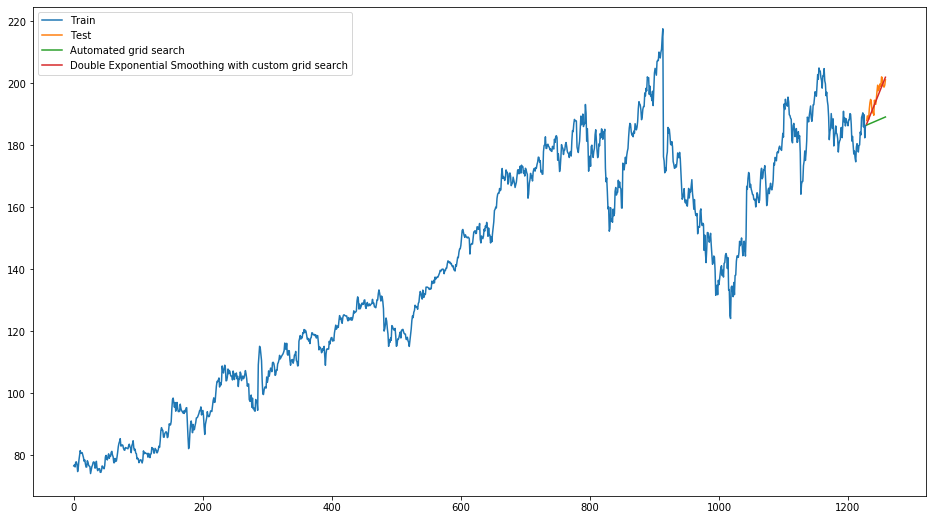

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()
